<h1 style="text-align:center;"> Finding Undervalued MLB Free Agents</h1>

<center> By: Joshua Phelan </center>

<center> For QMB 6905 with Dr. Hoover at the University of Florida </center>

## Project Overview

This project aims to take the perspective of the Tampa Bay Rays’ general management to find undervalued free agents in 2023. Specifically, I will investigate free agent batters and develop a model using historical batting statistics to predict salary. I will build models using several statistical and machine learning techniques, including: Linear Regression, Principal Component Analysis, K-Nearest Neighbors and Random Forest. I will compare the effectiveness of each of these models to determine which is the best to estimate the annual contract value of 2023 MLB free agent hitters. Then, I will evaluate the biggest needs of the Tampa Bay Rays’ roster by position to find ideal, undervalued free agent players considering the limited payroll spending of the organization.

## Business Understanding

Baseball is a unique sport as there is no true salary cap for team spending, resulting in much more inequal spending between the biggest market teams and smallest. The Tampa Bay Rays exist in a small market with an ownership group that does not like to spend a lot of money on team payroll. This results in the Rays being ranked near the bottom of team payroll spending in the MLB. Despite this, their teams have largely remained competitive for the past two decades, with two World Series appearances and many postseason appearances. MLB teams, and smaller market teams specifically, have been forced to embrace analytics to battle this inherent disadvantage. 

The Rays are a great example of a small market team using analytics successfully to remain competitive. However, the team can always improve, and the Rays have still not achieved the ultimate goal of winning the World Series. Because of this, I want to propose several realistic free agent targets that can help the team improve and hopefully win a World Series. There are many ways to acquire new players and improve a team, including via trade, the amateur draft, and international signings. The Rays are known for their savvy trades and player development and typically cannot compete with larger markets in free agency. They have lost top home-grown players to larger market teams in free agency. However, I want to propose several free agent options and a target salary prediction that the Rays can use to add talent below market value and within their payroll constraints.

## Data Understanding

After reviewing several baseball statistics websites and data sources, I found Baseball Reference to have the most complete information with many different kinds of batting statistics and salary amounts. All exported Baseball Reference tables include a column for their Baseball Reference Key, which is a unique ID for every baseball player in their database, which dates back to the 1800s. Combining datasets from different sources that do not share the same key values makes table joins much more difficult, as player names can have duplicate values or different spellings. I wanted to include more than the typical batting statistics to see if there are other statistics that better explain salary, so I decided on four batting statistics tables: Standard, Cumulative, Advanced and Value. 

Standard statistics includes the typical baseball statistics that most fans know, including Home Runs, RBI, Batting Average and On Base Plus Slugging Percentage, among others. The Cumulative statistics table provides the career totals and averages of standard statistics of each player, and includes the total years played. The Advanced Statistics table includes advanced batting, batting ratios, batted ball, win probability and baserunning statistics. Examples of these stats include Weighted On Base Average, Home Run Percentage and Exit Velocity. The Value statistics table includes values that attempt to summarize a player’s overall value compared to an average or replacement level player. Example statistics include Runs from Fielding, Runs Above Average and Wins Above Replacement. Annual salary is also included on this table.
A lot of the statistics I have gathered are derived from other simpler statistics. For example, a player with more hits will have a higher batting average. Knowing this, I can anticipate high multicollinearity between many of my predictors and consider this as I develop various models.

For data on free agents, I used Spotrac. They have a comprehensive table that allows me to filter by batters and free agent type. Although I would have preferred Baseball Reference to have a free agent list because of the included key values, I will still be able to add the Baseball Reference Key by using the playerid_lookup function from the pybaseball package, which I will detail further in the Data Preparation section.

## Data Preparation

### Data for Model
For building the model, I imported all the datasets from Baseball Reference to Spyder for Python. For the years 2015-2022 (omitting 2020), I imported the Cumulative Statistics, Advanced Statistics, Standard Statistics and Value Statistics tables. Each of these tables has around 25-30 columns and between 1,100 and 1,500 rows. I removed all duplicate columns among the tables and all duplicate Baseball Reference keys (indicating multiple teams in one season) before joining them based on their Baseball Reference key. 

Next, I began inspecting null values. I removed all rows with null values for salary and columns with a significant amount of null values, which included RS%, SB%, XBT%, GB/FB. I dropped rows with null values for Exit Velocity (EV) because these players did not qualify with enough plate appearances for EV and many other columns. After dropping the remaining rows with any null values, there were no more null values in the dataframe.

I then shifted my focus to the data types of the columns. Many needed to be converted from string to numeric. For the Salary column, I stripped the dollar sign from the string and converted it to an integer. I then looked at all non-numeric columns (except Baseball Reference Key and Position Summary), and converted these percentage strings to float values by removing the ‘%’ sign and converting them to decimals.

After the dataframe was complete with the proper data types, I optimized the dataframe for the purposes of my investigation. First, I am looking at predicting the salary of exclusively free agent players. However, MLB players are not eligible to be free agents until after six years of service. After three years, players can go to arbitration to adjust their salary, but this process heavily favors teams. Overall, players that sign contracts as free agents are paid significantly more than non-free agents, even with similar statistical production. This graph  below shows the average salary over years played, and the spike after six years is steep.

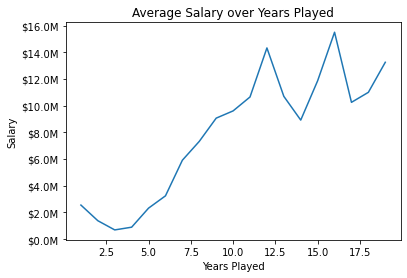

To keep a large enough dataset while minimizing unnecessary variation in batting statistics, I only kept players with more than 400 Plate Appearances (PA) for the season. For reference, a player needs 502 PA to qualify for batting awards at the end of the season.

To add more ways to differentiate players, I added dummy variables for positions. I took the Pos Summary column, which listed multiple positions and letters for DH, and replaced the column with the first number listed, assuming that was their primary position. I then created dummy variables based on the column with just 1 numeric value. In this case, if a batter had no position listed besides DH, I labeled them as position ‘1’ since no pitcher is remaining in the dataframe with over 400 plate appearances.

The boxplot below shows the distribution of salary by position for players in the 2015 dataset. There appears to be significant differences for several positions, especially First Base and Right Field.

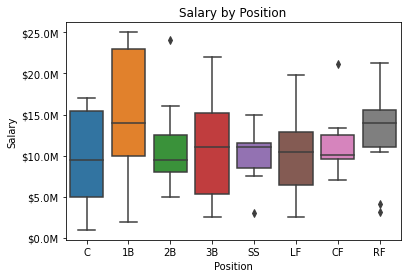

I also created dummy variables for several top statistics to indicate whether the statistic was in the 90th percentile or not. This helped reduced issues with multicollinearity. The statistics I chose were HR, RBI, 3B, TB, WAR, OPS, H, and AB.

Finally, I included a column, "Year", to indicate the year the observation took place. This acts as an inflation adjuster as MLB salaries increase rapidly with time.

After replicating these steps for each year using the “prepare” function I created, I combined all 6 years of data from 2015-2021 (omitting 2020) into one dataframe which I would use for the final model. I did not include 2022 data to train the model because I will be predicting salary for free agents based on their 2022 statistics.

### Data for Predictions

The other data set I prepared was for the 2023 free agents. After navigating to the Spotrac website and their free agent page, I filtered for batters and unrestricted free agents. The scope of my investigation is limited to position players, and other free agent types are not necessarily free agents available to all teams. For example, a contract with a club option will typically result in the team exercising that option for good players on reasonable contracts. So, I will avoid investigating free agents with club, player or mutual options.

From this filtered table on Spotrac, I read the URL in Spyder and saved the table as a dataframe object. I removed 2 levels of the multi-level index columns, removed unnecessary columns and renamed the player name column to “Name”. Next, I added the Baseball Reference Key in a new column using the playerid_lookup function from the pybaseball package. The playerid_lookup function with Fuzzy=True returns the 5 most similar names to the first and last name inputted. Sometimes, the first player returned is not a current player and therefore would return the incorrect Baseball Reference key. Because of this, I only returned the key if the player’s last year played was 2015 or later.

Next, I added the 2022 batting statistics to the free agents table because those statistics are used to predict their 2023 salary. Using the “prepare” function, I prepared the table of 2022 batting statistics and then performed an inner join with the free agents table. This joined table is used for the final predictions of 2023 free agent salaries.

## Modeling

I created six different models to predict MLB batter salaries: Forward Stepwise Regression, Lasso Regression, Principal Component Analysis, K-Nearest Neighbors, K-Nearest Neighbors with Principal Component Analysis, and Random Forest. I will show my steps for creating each of these models below.

### Visualizing the Data

Before developing the models, I will look at salary and a few of the top batting statistics to see if there are any relationships evident.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline

In [2]:
batting=pd.read_csv('Batting Dataframe 2015-2021.csv',index_col='Unnamed: 0')

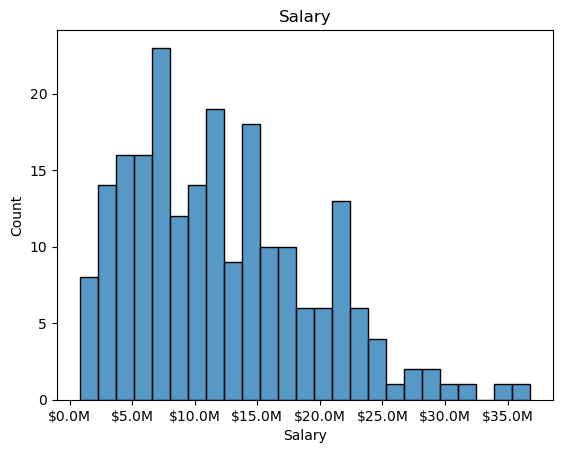

In [3]:
# Histogram of Salary
import warnings
warnings.filterwarnings("ignore")
g = sns.histplot(x='Salary',data=batting,bins=25)
plt.title("Salary")
plt.ticklabel_format(style='plain')
xlabels = ['$'+'{:,.1f}'.format(x) + 'M' for x in g.get_xticks()/1000000]
g.set_xticklabels(xlabels);

Text(0.5, 0, 'Log(Salary)')

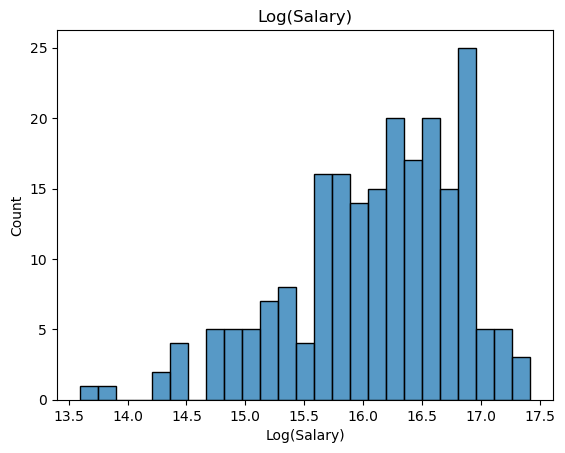

In [4]:
# Histogram of Log(Salary)
logSalary = np.log(batting['Salary'])
sns.histplot(x=logSalary,bins=25)
plt.title("Log(Salary)")
plt.xlabel("Log(Salary)")

I considered a log transformation of salary because of its right skew, but the histogram of log(Salary) does not show a normal distribution. Additionally, when I tested models attempting to predict log(Salary), I found larger errors and less effective models.

Next, I will show histograms of top batting statistics that are familiar to most baseball fans.

Text(0.5, 1.0, 'HR')

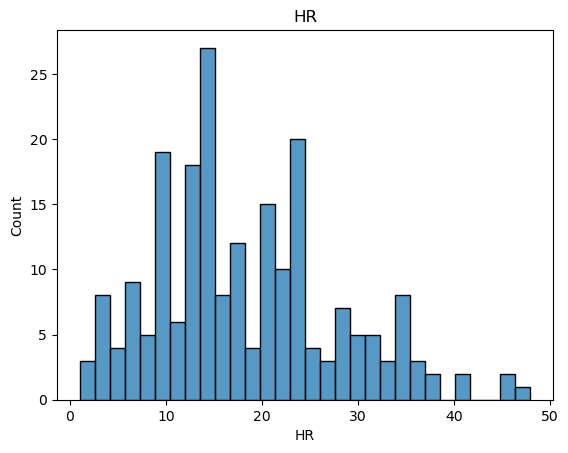

In [5]:
# Histogram of Home Runs
sns.histplot(x='HR',data=batting,bins=30)
plt.title("HR")

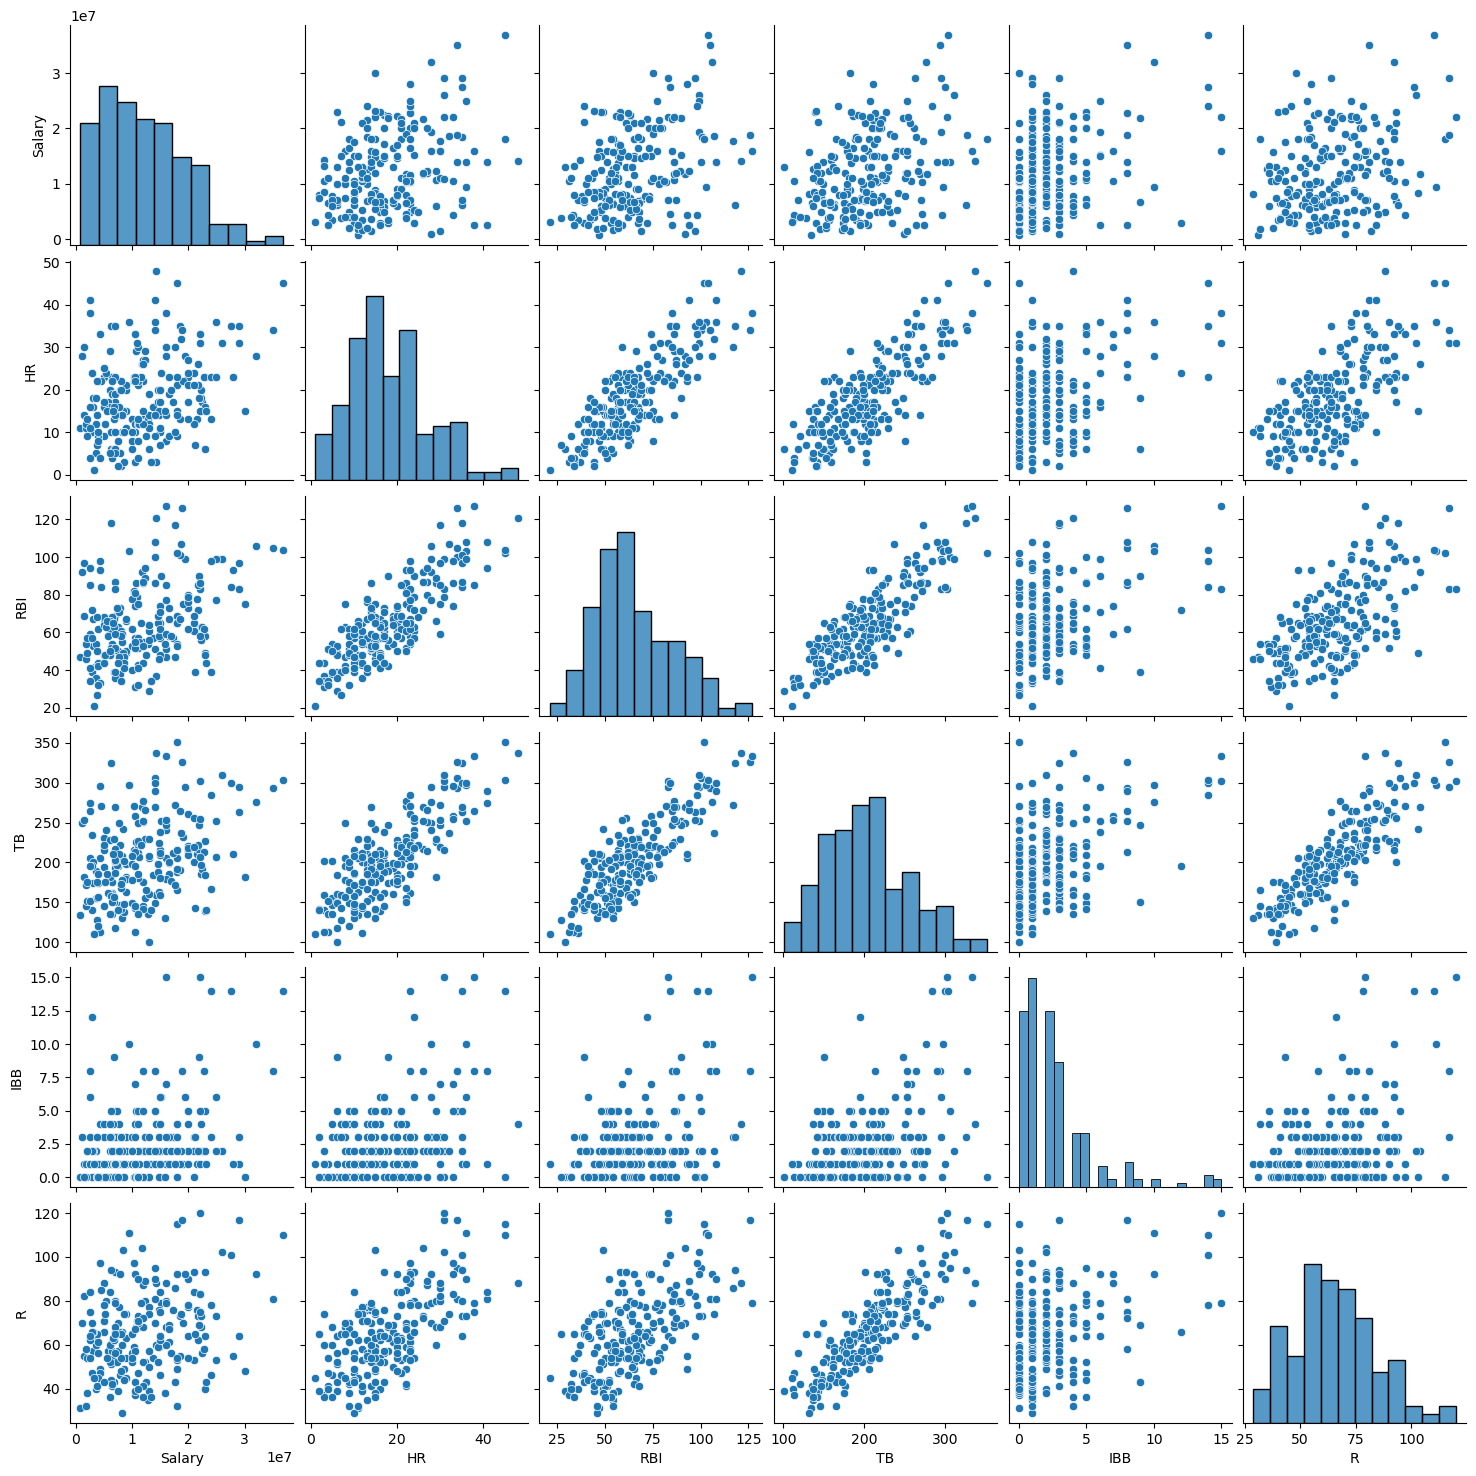

In [6]:
topStats = batting[['Salary','HR','RBI','TB','IBB','R']]
sns.pairplot(topStats)

This pairplot shows Salary, Home Runs, Runs Batted In, Total Bases, Intentional Walks and Runs. Aside from IBB, the other statistics appear normally distributed in the histograms. The first row shows the relationship between salary and the various statistics, and there only appears to be a weak positive relationship for all of them.

Strong correlations are seen between many of the statistics, for example between RBI and HR. This makes sense as a player with more home runs will have more runs batted in. This presents issues of multicollinearity between many of the potential predictors in the models. This led me to create dummy variables for many of these top statistics where the variable equals 1 when the player is in the 90th percentile or better for the statistic. Additionally, I will look at the Variance Inflation Factor for all variables in multiple linear regression models to ensure I am avoiding predictors that overlap in information shared.

### Model 1: Forward Stepwise Regression

The first model I created is a multiple linear regression model. After prepping the dataset with 100 numerical columns that could potentially be independent variables, I knew I needed to reduce the predictors in the model to a more realistic number considering the number of observations in the dataset.

To do this, I ran a forward and backward stepwise regression using R. 

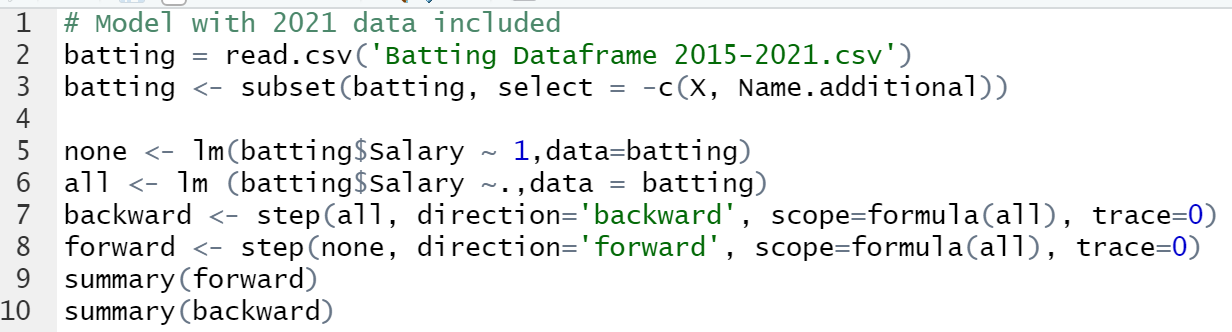

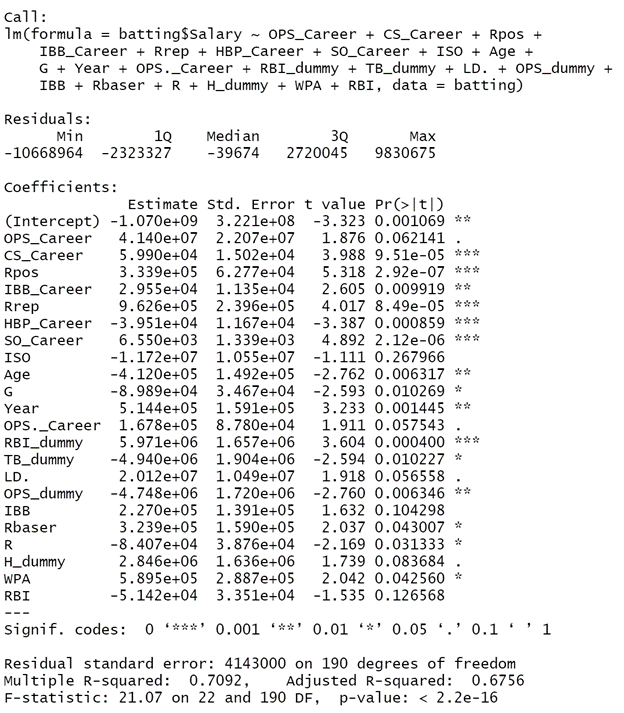

This model has 22 predictors and an adjusted R^2 of .6756. The backward stepwise regression model had an identical adjusted R^2, but with 59 predictors instead of 22. To move forward with the model above, I began removing predictors to ensure the Variance Inflation Factor (VIF) for all was less than 5. Here is the initial VIF output below.

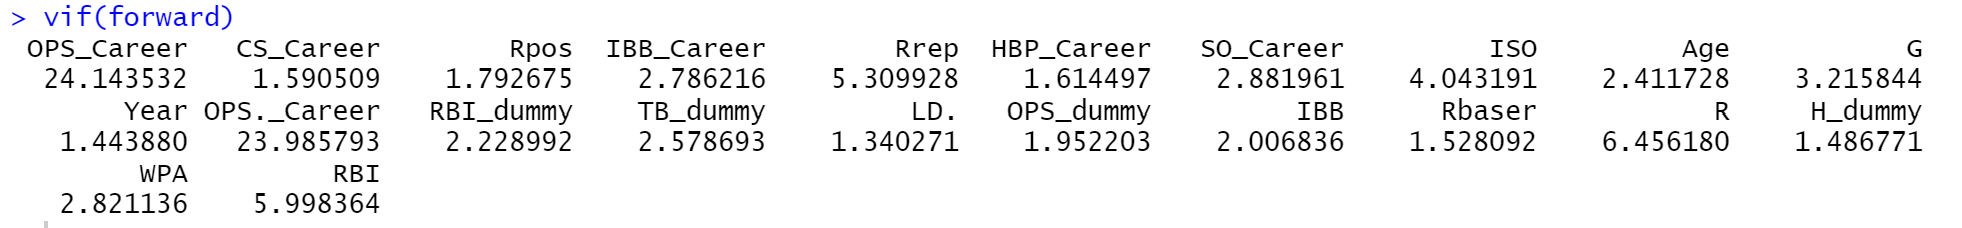

Eventually, I removed 4 variables, resulting in the model below. 

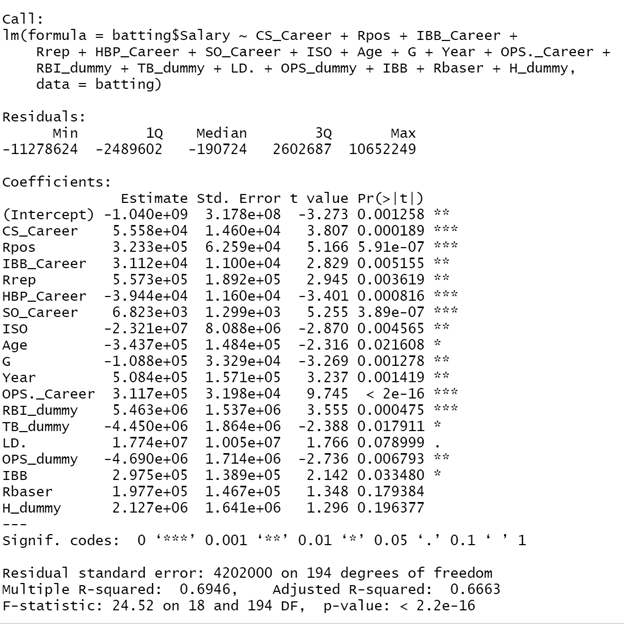

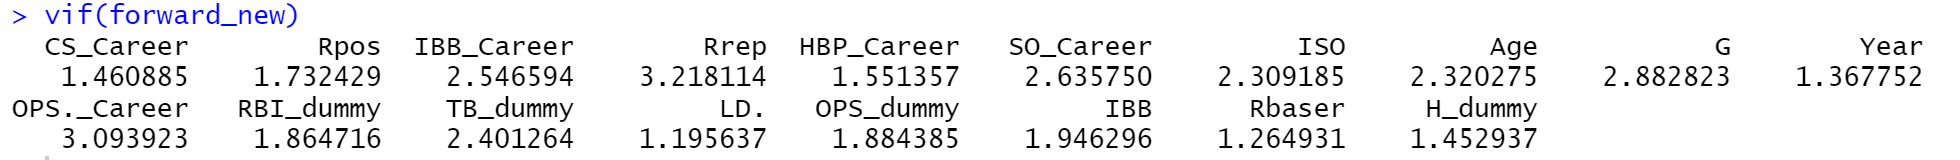

This model explains just 1% less variation than the initial forward stepwise model, but has 4 less predictors and no issues with multicollinearity. Below is a dictionary of all the variables used in this model.

In [7]:
stepwiseVar = pd.read_csv('Stepwise Model Variables Dictionary.csv')

from pandas import option_context
with option_context('display.max_colwidth', None):
    display(stepwiseVar)

,Variable,Definition
0,CS_Career,Number of times caught stealing in career
1,Rpos,Number of runs above or below average due to positional differences
2,IBB_Career,Number of intentional walks in career
3,Rrep,Number of runs an average player is better than a replacement player
4,HBP_Career,Number of times hit by pitch in career
5,SO_Career,Number of strikeouts in career
6,ISO,Isolated power: (Total Bases - Hits) / At Bats
7,Age,Age of player
8,G,Number of games played in season
9,Year,Year the player's statistics are from


I will now run the linear regression model developed above using a 70-30% train-test-split in Python.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import feature_selection
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression

In [9]:
predictors = ["CS_Career", "Rpos","IBB_Career", "Rrep", "HBP_Career", "SO_Career", "ISO", "Age", 
                    "G", "Year", "OPS+_Career", "RBI_dummy", "TB_dummy", "LD%", "OPS_dummy", 
                    "IBB", "Rbaser","H_dummy"]

X = batting[predictors]
y = batting['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3,random_state=101)

lmStepwise = LinearRegression()

lmStepwise.fit(X_train,y_train)

pred = lmStepwise.predict(X_test)

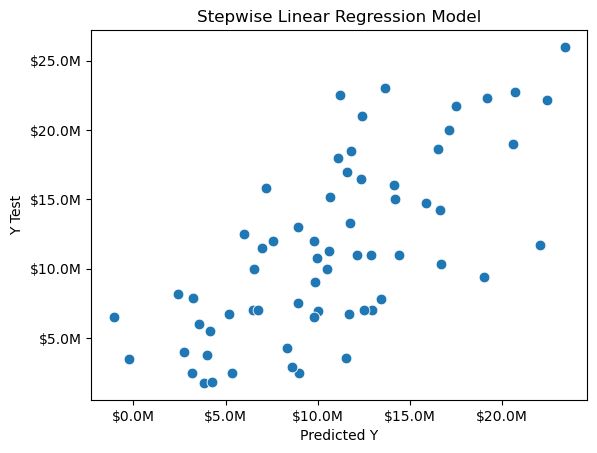

In [10]:
# Predicted vs Actual Plot
g = sns.scatterplot(pred,y_test, s=60)
plt.title('Stepwise Linear Regression Model')
plt.xlabel('Predicted Y')
plt.ylabel('Y Test')
plt.ticklabel_format(style='plain')
xlabels = ['$'+'{:,.1f}'.format(x) + 'M' for x in g.get_xticks()/1000000]
g.set_xticklabels(xlabels)
ylabels = ['$'+'{:,.1f}'.format(y) + 'M' for y in g.get_yticks()/1000000]
g.set_yticklabels(ylabels);

A weak positive trend is shown in the Predicted vs Actual scatterplot. This indicates the model can moderately explain variance in salary, but the relationship could be much stronger.

The pairplot in the section above shows weak linear relationships between independent variables and salary, indicating the Linearity condition of linear regression is satisfied.

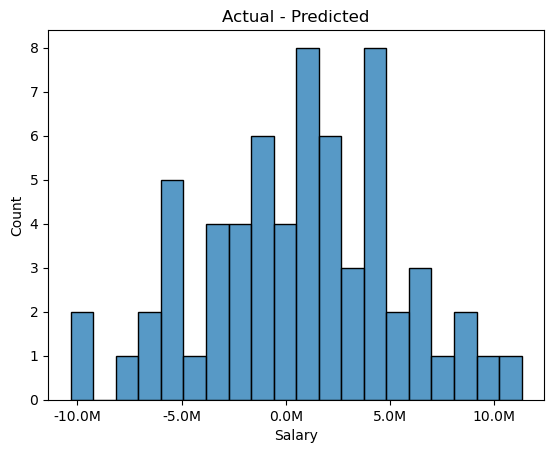

In [11]:
# Histogram of Residuals
g = sns.histplot((y_test-pred),bins=20)
plt.title('Actual - Predicted')
xlabels = ['{:,.1f}'.format(x) + 'M' for x in g.get_xticks()/1000000]
g.set_xticklabels(xlabels);

The Nearly Normal condition is satisfied as the residuals appear to be normally disributed, with most errors falling within 5,000,000. However, a few predictions had errors close to 10,000,000. 

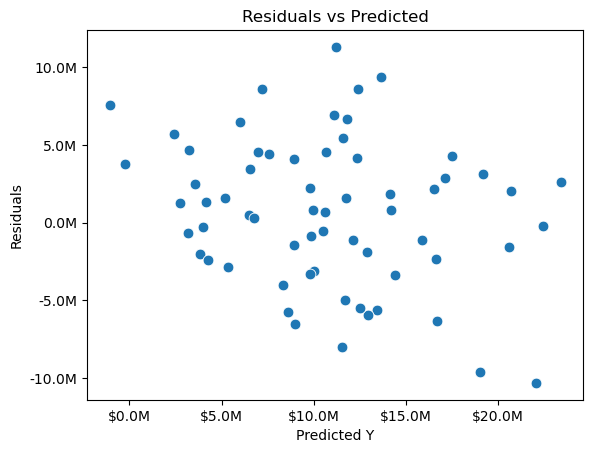

In [12]:
# Residuals vs Predicted Plot
g = sns.scatterplot(pred, (y_test-pred),s=60)
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Y')
plt.ylabel('Residuals')
plt.ticklabel_format(style='plain')
xlabels = ['$'+'{:,.1f}'.format(x) + 'M' for x in g.get_xticks()/1000000]
g.set_xticklabels(xlabels)
ylabels = ['{:,.1f}'.format(y) + 'M' for y in g.get_yticks()/1000000]
g.set_yticklabels(ylabels);

The Residuals vs Predicted plot appears mostly evenly spread around zero, with the exception of a couple outliers in the bottom right of the graph where the model overpredicted salary by around $10,000,000. This indicates the Independence Assumption is satisfied. The residuals have a large spread, so the model could improve in accuracy. The spread of the residuals remains equal throughout all predicted salary values, indicating the Equal Spread condition is satisified.

In [13]:
print('MAE:', round(metrics.mean_absolute_error(y_test, pred),2))
print('MSE:', round(metrics.mean_squared_error(y_test, pred),2))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, pred)),2))
r2 = metrics.r2_score(y_test, pred)
adj_r2 = 1-(((1-r2)*((len(y))-1))/((len(y))-(len(predictors))-1))
print('R^2:', round(r2,4))
print('Adj R^2:', round(adj_r2,4))
mape = metrics.mean_absolute_percentage_error(y_test, pred)
print('MAPE:', round(mape*100,2), '%')
accuracy = 1 - mape
print('Accuracy:', round(accuracy*100, 2), '%.')

MAE: 3821302.35
MSE: 22218439369069.04
RMSE: 4713643.96
R^2: 0.4462
Adj R^2: 0.3948
MAPE: 48.82 %
Accuracy: 51.18 %.


This model explains close to 40% of the variation in salary and has a Root Mean Squared Error of $4.7 million. As shown by the plots above, the model has some value in predicting salary but could be much stronger.

### Model 2: Lasso Regression

To reduce the number of predictors in a model, I developed a Lasso Regression model in R. Because stepwise regression has issues with bias in coefficents, I am using Lasso because it performs better when multicollinearity is present and completely drops predictors that are not influential enough. Using cross validation, I am able to find the optimal lambda where mean squared error is minimized at the point of optimal trade-off between bias and variance.

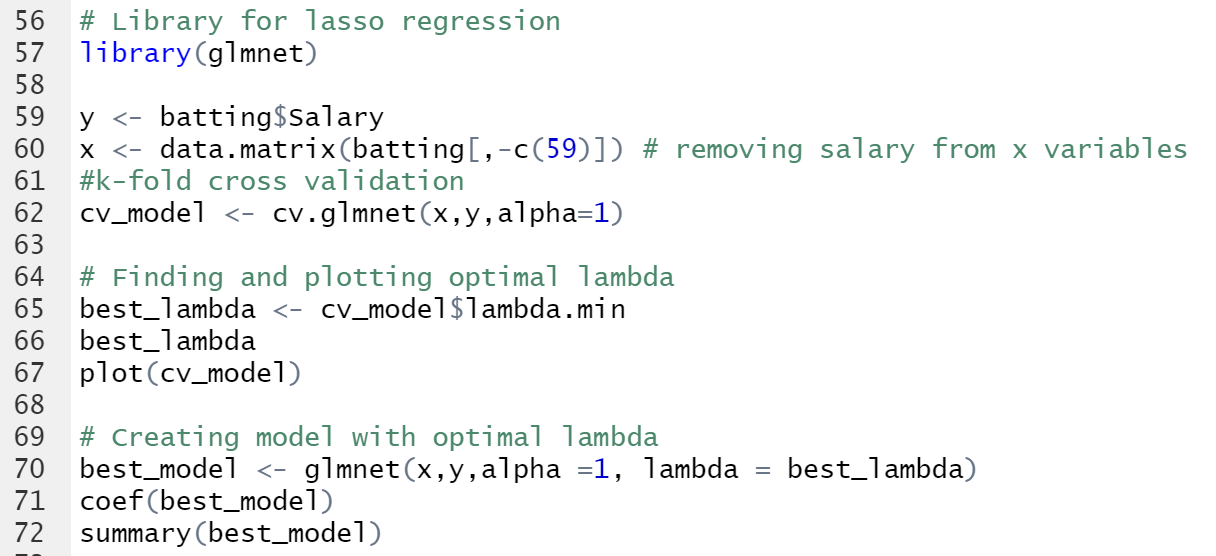

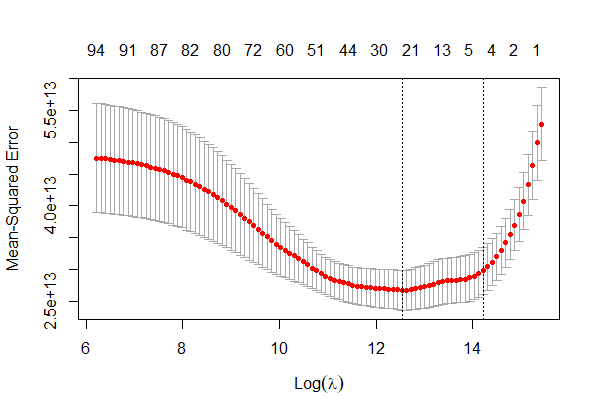

All the predictors that the model determined to be influential were returned in a sparse matrix with their resulting coefficients. Predictors that had no influential value had their coefficient reduced to zero. To move forward with the coefficients selected, I began removing predictors to ensure the Variance Inflation Factor (VIF) for all was less than 5. Here is the initial VIF output below.

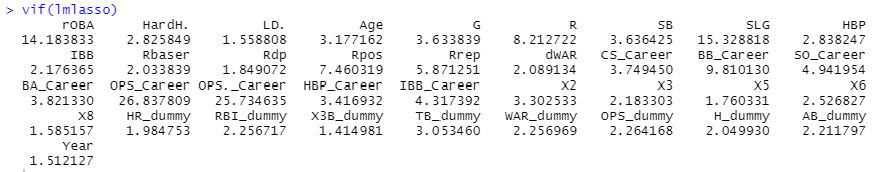

Eventually, I removed 15 variables, resulting in the model below. 

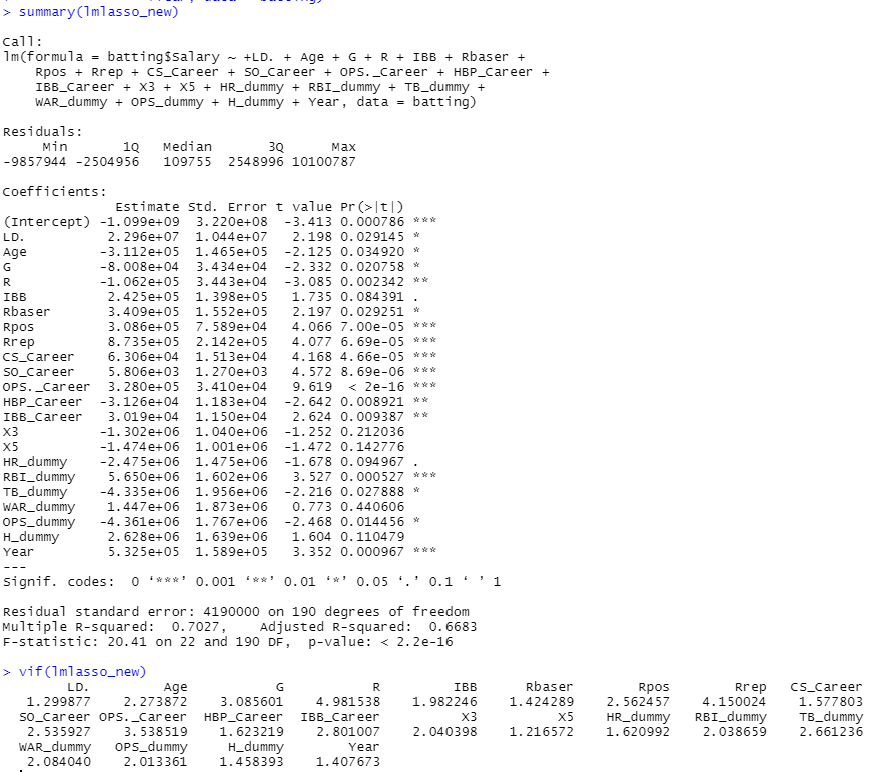

The adjusted R^2 of this further reduced model is 1% better than the initial Lasso model with an adjusted R^2 of .6683. There are no issues with multicollinearity among the variable chosen. Below is a dictionary of all the variables used in this model.

In [14]:
lassoVar = pd.read_csv('Lasso Model Variables Dictionary.csv')
lassoVar.dropna(axis=0,inplace=True)

from pandas import option_context
with option_context('display.max_colwidth', None):
    display(lassoVar)

,Variable,Definition
0,CS_Career,Number of times caught stealing in career
1,Rpos,Number of runs above or below average due to positional differences
2,IBB_Career,Number of intentional walks in career
3,Rrep,Number of runs an average player is better than a replacement player
4,HBP_Career,Number of times hit by pitch in career
5,SO_Career,Number of strikeouts in career
6,Age,Age of player
7,G,Number of games played in season
8,Year,Year the player's statistics are from
9,OPS+_Career,"On Base Plus Slugging normalized for a season, where 100 is league average"


I will now run the linear regression model developed above in Python using a 70-30% train-test-split.

In [15]:
predictors = ["LD%", "Age", "G", "R", "IBB", "Rbaser", "Rpos", "Rrep", "CS_Career",
              "SO_Career", "OPS+_Career", "HBP_Career", "IBB_Career", "3", "5",     
              "HR_dummy", "RBI_dummy", "TB_dummy", "WAR_dummy", "OPS_dummy", "H_dummy", "Year" ]
X = batting[predictors]
y = batting['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3,random_state=101)

lmLasso = LinearRegression()

lmLasso.fit(X_train,y_train)

pred = lmLasso.predict(X_test)

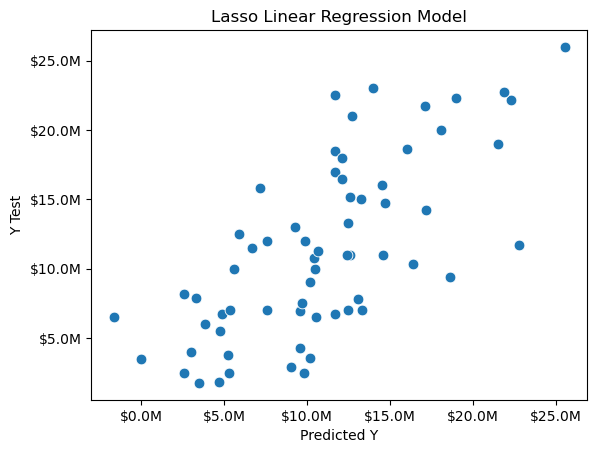

In [16]:
# Predicted vs Actual Plot
g = sns.scatterplot(pred,y_test, s=60)
plt.title('Lasso Linear Regression Model')
plt.xlabel('Predicted Y')
plt.ylabel('Y Test')
plt.ticklabel_format(style='plain')
xlabels = ['$'+'{:,.1f}'.format(x) + 'M' for x in g.get_xticks()/1000000]
g.set_xticklabels(xlabels)
ylabels = ['$'+'{:,.1f}'.format(y) + 'M' for y in g.get_yticks()/1000000]
g.set_yticklabels(ylabels);

A weak positive trend is shown in the Predicted vs Actual scaterplot. This indicates the model can moderately explain variance in salary, but the relationship could be much stronger.

The pairplot in the Visualization section above shows weak linear relationships between independent variables and salary, indicating the Linearity condition of linear regression is satisfied.

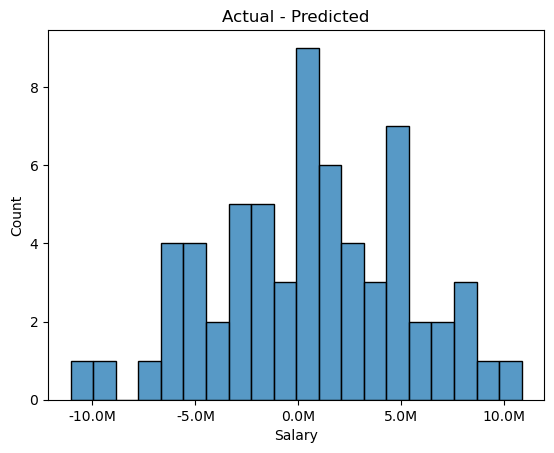

In [17]:
# Histogram of Residuals
g = sns.histplot((y_test-pred),bins=20)
plt.title('Actual - Predicted')
xlabels = ['{:,.1f}'.format(x) + 'M' for x in g.get_xticks()/1000000]
g.set_xticklabels(xlabels);

The Nearly Normal condition is satisfied as the residuals appear to be normally disributed, with most errors falling within 5,000,000. However, a few predictions had errors close to 10,000,000. 

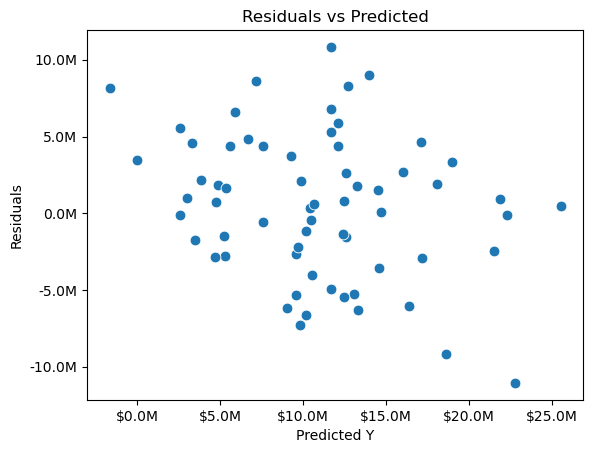

In [18]:
# Residuals vs Predicted Plot
g = sns.scatterplot(pred, (y_test-pred),s=60)
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Y')
plt.ylabel('Residuals')
plt.ticklabel_format(style='plain')
xlabels = ['$'+'{:,.1f}'.format(x) + 'M' for x in g.get_xticks()/1000000]
g.set_xticklabels(xlabels)
ylabels = ['{:,.1f}'.format(y) + 'M' for y in g.get_yticks()/1000000]
g.set_yticklabels(ylabels);

The Residuals vs Predicted plot appears mostly evenly spread around zero, with the exception of a couple outliers in the bottom right of the graph where the model overpredicted salary by close to $10,000,000. This indicates the Independence Assumption is satisfied. The residuals have a large spread, so the model could improve in accuracy. The spread of the residuals remains equal throughout all predicted salary values, indicating the Equal Spread condition is satisified.

In [19]:
print('MAE:', round(metrics.mean_absolute_error(y_test, pred),2))
print('MSE:', round(metrics.mean_squared_error(y_test, pred),2))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, pred)),2))
r2 = metrics.r2_score(y_test, pred)
adj_r2 = 1-(((1-r2)*((len(y))-1))/((len(y))-(len(predictors))-1))
print('R^2:', round(r2,4))
print('Adj R^2:', round(adj_r2,4))
mape = metrics.mean_absolute_percentage_error(y_test, pred)
print('MAPE:', round(mape*100,2), '%')
accuracy = 1 - mape
print('Accuracy:', round(accuracy*100, 2), '%.')

MAE: 3775431.56
MSE: 21949183139827.43
RMSE: 4684995.53
R^2: 0.4529
Adj R^2: 0.3896
MAPE: 49.39 %
Accuracy: 50.61 %.


This model explains close to 39% of the variation in salary and has a Root Mean Squared Error of under $4.7 million. As shown by the plots above, the model has some value in predicting salary but could be much stronger.

### Model 3: Principal Component Analysis

I performed this model using Principal Component Analysis to reduce the number of dimensions while retaining as much information as possible. Additionally, I can avoid issues with multicolinearity among these variables.

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
from sklearn.model_selection import RepeatedKFold
from sklearn import model_selection

In [21]:
batting_num = batting.drop(['Salary','Name-additional'],axis=1)

predictors=batting_num.columns
X = batting[predictors]
y = batting['Salary']

pca = PCA()
X_reduced = pca.fit_transform(scale(X))

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=101)

lmPCA = LinearRegression()
mse = []
# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(lmPCA,
           np.ones((len(X_reduced),1)), y, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 20):
    score = -1*model_selection.cross_val_score(lmPCA,
               X_reduced[:,:i], y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)

Text(0.5, 1.0, 'Salary')

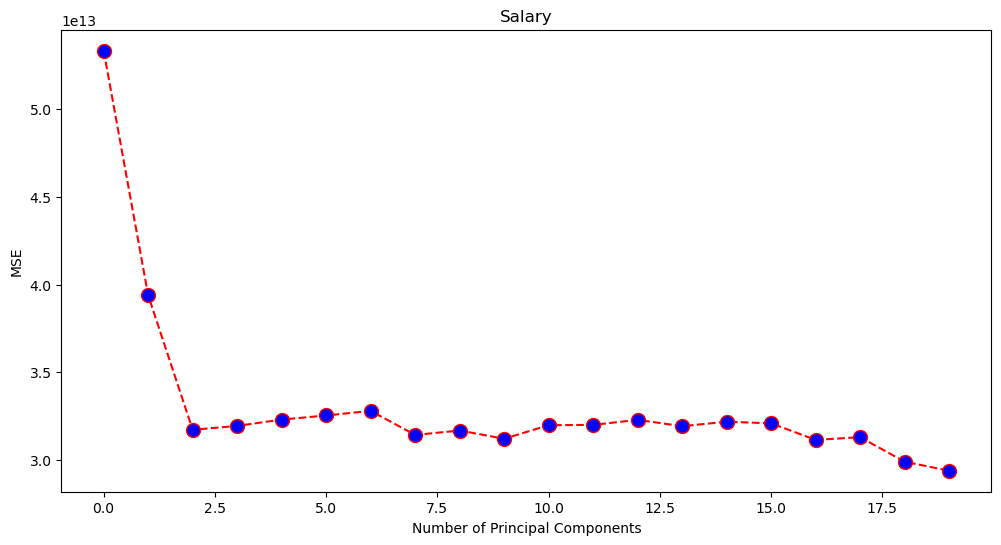

In [22]:
# Plot cross-validation results    
plt.figure(figsize=(12, 6))
plt.plot(mse,color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('Salary')

In [23]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 25.74,  42.3 ,  51.07,  56.59,  61.39,  65.18,  67.88,  70.02,
        72.08,  73.79,  75.46,  77.06,  78.45,  79.82,  81.16,  82.36,
        83.47,  84.55,  85.6 ,  86.59,  87.51,  88.37,  89.21,  89.92,
        90.61,  91.24,  91.86,  92.43,  92.99,  93.52,  94.03,  94.51,
        94.96,  95.39,  95.77,  96.11,  96.43,  96.72,  97.  ,  97.26,
        97.51,  97.74,  97.96,  98.17,  98.35,  98.52,  98.67,  98.81,
        98.94,  99.05,  99.16,  99.25,  99.33,  99.41,  99.48,  99.55,
        99.61,  99.66,  99.7 ,  99.74,  99.78,  99.81,  99.84,  99.87,
        99.89,  99.91,  99.93,  99.95,  99.96,  99.97,  99.98,  99.99,
       100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  ,
       100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  ,
       100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  ,
       100.  , 100.  , 100.  , 100.  ])

The graph and array above show how the model mean squared error and explained variance change with each principal component added. The first four components have a significant impact in reducing MSE and increasing explained variance, while adding even more components has only marginal benefits.

In [24]:
# Fitting results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3,random_state = 101)

# Scale the training and testing data using the first 4 components
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))[:,:3]

# Train PCR model on training data using the first 4 components
lmPCA = LinearRegression()
lmPCA.fit(X_reduced_train[:,:3], y_train)

pred = lmPCA.predict(X_reduced_test)

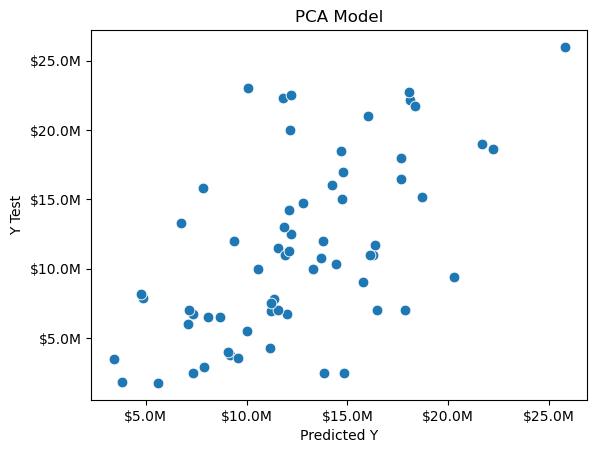

In [25]:
# Predicted vs Actual Plot
g = sns.scatterplot(pred,y_test, s=60)
plt.title('PCA Model')
plt.xlabel('Predicted Y')
plt.ylabel('Y Test')
plt.ticklabel_format(style='plain')
xlabels = ['$'+'{:,.1f}'.format(x) + 'M' for x in g.get_xticks()/1000000]
g.set_xticklabels(xlabels)
ylabels = ['$'+'{:,.1f}'.format(y) + 'M' for y in g.get_yticks()/1000000]
g.set_yticklabels(ylabels);

There is a weak positive trend in the Predicted vs Actual plot.

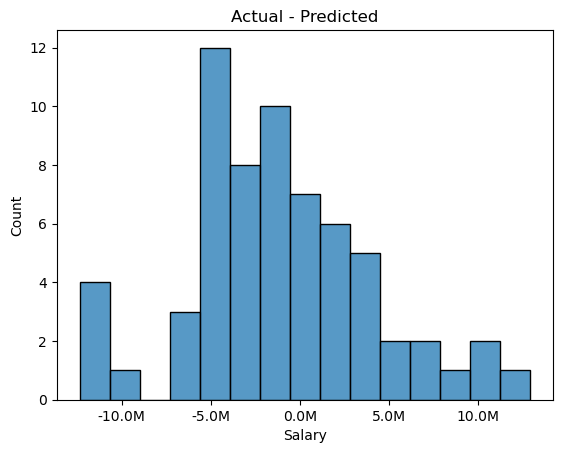

In [26]:
# Histogram of Residuals
g = sns.histplot((y_test-pred),bins=15)
plt.title('Actual - Predicted')
xlabels = ['{:,.1f}'.format(x) + 'M' for x in g.get_xticks()/1000000]
g.set_xticklabels(xlabels);

The residuals have a right skew centered closer to -3,000,000. This indicates that more predictions were overpredictions than underpredictions. Compared to the previous two models, there are many more errors greater than $10,000,000.

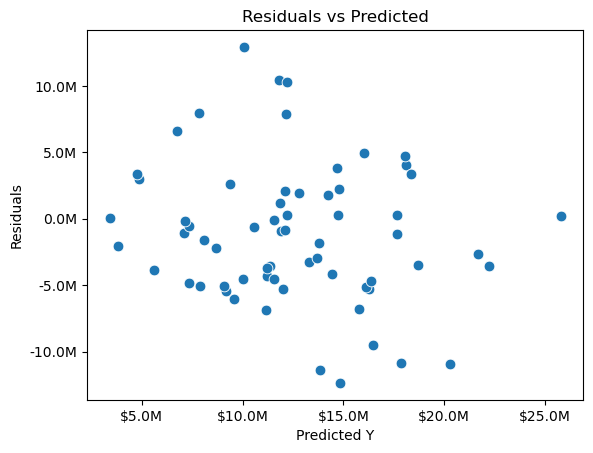

In [27]:
# Residuals vs Predicted Plot
g = sns.scatterplot(pred, (y_test-pred),s=60)
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Y')
plt.ylabel('Residuals')
plt.ticklabel_format(style='plain')
xlabels = ['$'+'{:,.1f}'.format(x) + 'M' for x in g.get_xticks()/1000000]
g.set_xticklabels(xlabels)
ylabels = ['{:,.1f}'.format(y) + 'M' for y in g.get_yticks()/1000000]
g.set_yticklabels(ylabels);

The Residuals vs Predicted plot appears mostly evenly spread around zero, with more of the predictions clumped on the left side of the plot. For higher predicted salary values, the residuals were spread in the bottom right of the plot, indicating the model overpredicted more at higher salary values. The residuals have a large spread, so the model could improve in accuracy, especially at higher salary predictions.

In [28]:
print('MAE:', round(metrics.mean_absolute_error(y_test, pred),2))
print('MSE:', round(metrics.mean_squared_error(y_test, pred),2))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, pred)),2))
r2 = metrics.r2_score(y_test, pred)
adj_r2 = 1-(((1-r2)*((len(y))-1))/((len(y))-(4)-1))
print('R^2:', round(r2,4))
print('Adj R^2:', round(adj_r2,4))
mape = metrics.mean_absolute_percentage_error(y_test, pred)
print('MAPE:', round(mape*100,2), '%')
accuracy = 1 - mape
print('Accuracy:', round(accuracy*100, 2), '%.')

MAE: 4210771.04
MSE: 28461960071391.48
RMSE: 5334975.17
R^2: 0.2906
Adj R^2: 0.277
MAPE: 64.0 %
Accuracy: 36.0 %.


This model explains 27.7% of the variation in salary and has a Root Mean Squared Error of over $5.3 million. As shown by the plots above, the model has some value in predicting salary but could be much stronger, especially with the consistent overpredictions of higher salary values.

### Model 4: K-Nearest Neighbors

The next model uses K-Nearest Neighbors Regression to estimate salary based on the Minkowski distance between data points.

In [29]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

Text(0, 0.5, 'Mean Absolute Error')

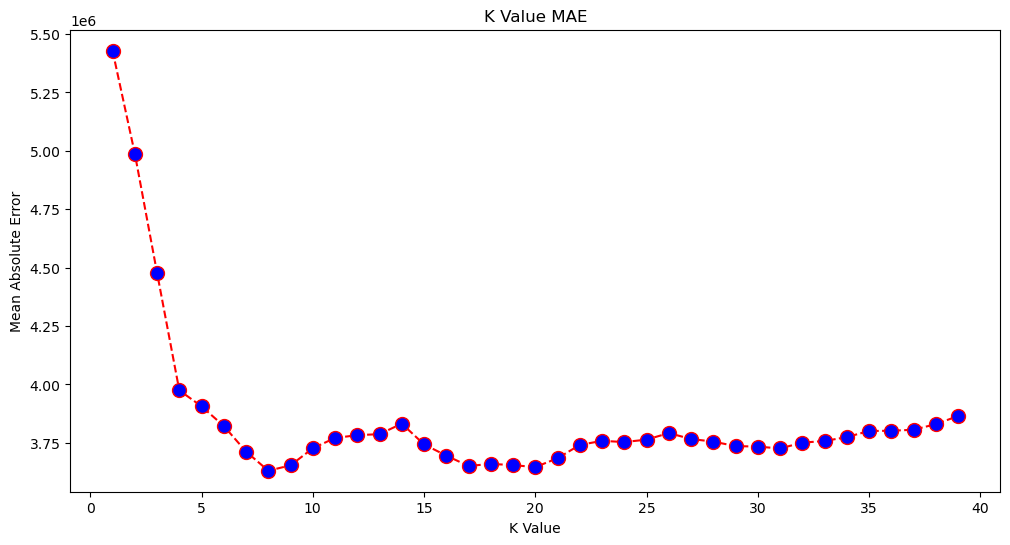

In [30]:
predictors =batting_num.columns
X = batting[predictors]
y = batting['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3,random_state=101)


# Finding right number of K
error = []

# Calculating MAE error for K values between 1 and 39
for i in range(1, 40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    mae = metrics.mean_absolute_error(y_test, pred_i)
    error.append(mae)
    
# K-Value and MSE
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

The plot above illustrates the mean absolute error based on the K value. K=8 had the minimum error, so I will use 8 as the number of nearest neighbors for the model.

In [31]:
knn = KNeighborsRegressor(n_neighbors=8)

knn.fit(X_train, y_train)

# Predict on test dataset 
from sklearn import metrics

pred = knn.predict(X_test)

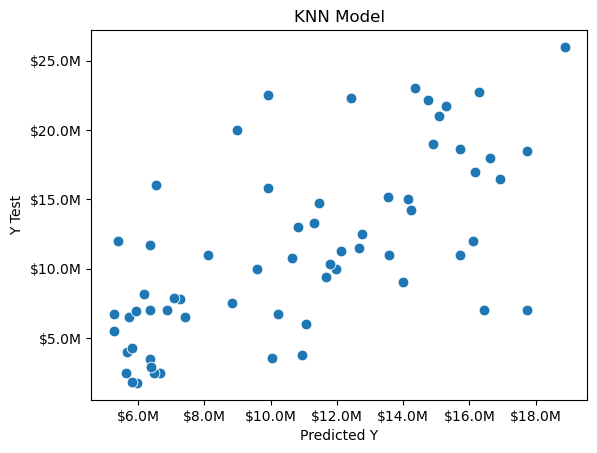

In [32]:
# Predicted vs Actual Plot
g = sns.scatterplot(pred,y_test, s=60)
plt.title('KNN Model')
plt.xlabel('Predicted Y')
plt.ylabel('Y Test')
plt.ticklabel_format(style='plain')
xlabels = ['$'+'{:,.1f}'.format(x) + 'M' for x in g.get_xticks()/1000000]
g.set_xticklabels(xlabels)
ylabels = ['$'+'{:,.1f}'.format(y) + 'M' for y in g.get_yticks()/1000000]
g.set_yticklabels(ylabels);

There is a very weak positive trend in the Predicted vs Actual plot. There is a higher density of the data points focused close to the origin with low actual and predicted salary values.

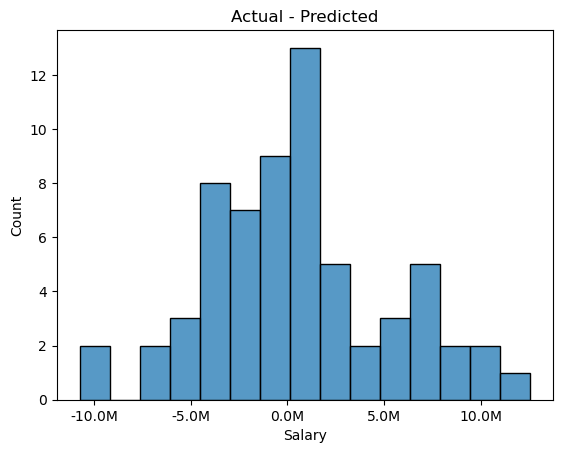

In [33]:
# Histogram of Residuals
g = sns.histplot((y_test-pred),bins=15)
plt.title('Actual - Predicted')
xlabels = ['{:,.1f}'.format(x) + 'M' for x in g.get_xticks()/1000000]
g.set_xticklabels(xlabels);

The residuals appear to be normally disributed, with most errors falling within 5,000,000 and centered around zero. However, a few predictions had errors above 10,000,000. 

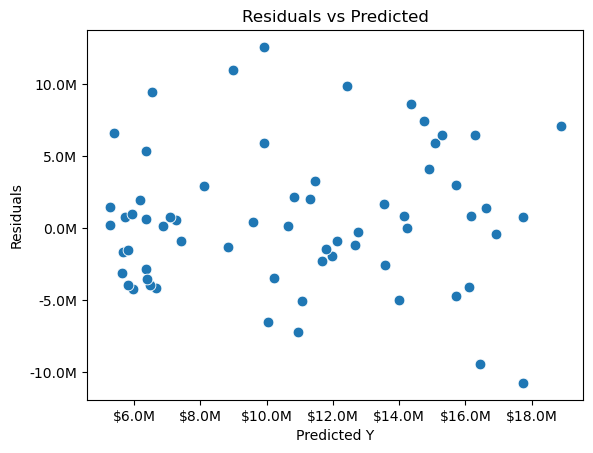

In [34]:
# Residuals vs Predicted Plot
g = sns.scatterplot(pred, (y_test-pred),s=60)
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Y')
plt.ylabel('Residuals')
plt.ticklabel_format(style='plain')
xlabels = ['$'+'{:,.1f}'.format(x) + 'M' for x in g.get_xticks()/1000000]
g.set_xticklabels(xlabels)
ylabels = ['{:,.1f}'.format(y) + 'M' for y in g.get_yticks()/1000000]
g.set_yticklabels(ylabels);

The Residuals vs Predicted plot appears mostly evenly spread around zero, with more of the predictions clumped on the left side of the plot close to zero. For higher predicted salary values, the residuals were spread farther from zero. The residuals have a large spread, so the model could improve in accuracy.

In [35]:
print('MAE:', round(metrics.mean_absolute_error(y_test, pred),2))
print('MSE:', round(metrics.mean_squared_error(y_test, pred),2))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, pred)),2))
r2 = metrics.r2_score(y_test, pred)

adj_r2 = 1-(((1-r2)*((len(y))-1))/((len(y))-(len(predictors))-1))
print('R^2:', round(r2,4))
print('Adj R^2:', round(adj_r2,4))
mape = metrics.mean_absolute_percentage_error(y_test, pred)
print('MAPE:', round(mape*100,2), '%')
accuracy = 1 - mape
print('Accuracy:', round(accuracy*100, 2), '%.')

MAE: 3630634.1
MSE: 22930889701650.71
RMSE: 4788620.86
R^2: 0.4285
Adj R^2: -0.0819
MAPE: 47.77 %
Accuracy: 52.23 %.


This model has a Root Mean Squared Error of under $4.8 million. The R^2 is .4285, but the adjusted R^2 is negative in this case because all 100 of the numerical predictors are included in this model and the formula for adjusted R^2 punishes the model for having too many predictors. Aside from adjusted R^2, the model results are fairly similar to the first two multiple linear regression models. These results are somewhat surprising after looking at the Predicted vs Actual plot, as the trend appeared much weaker than the previous model that performed much worse aside from adjusted R^2.

### Model 5: K-Nearest Neighbors with Principal Component Analysis

Because K-Nearest Neighbors works better with fewer dimensions, I will reduce the dimensions from the previous model using Principal Component Analysis before applying a K-Nearest Neighbor Regression.

In [36]:
predictors=batting_num.columns
X = batting[predictors]
y = batting['Salary']

pca = PCA()
X_reduced = pca.fit_transform(scale(X))

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=101)

knn_PCA = KNeighborsRegressor(n_neighbors=8)
mse = []

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(knn_PCA,
           np.ones((len(X_reduced),1)), y, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 20):
    score = -1*model_selection.cross_val_score(knn_PCA,
               X_reduced[:,:i], y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)

Text(0.5, 1.0, 'Salary')

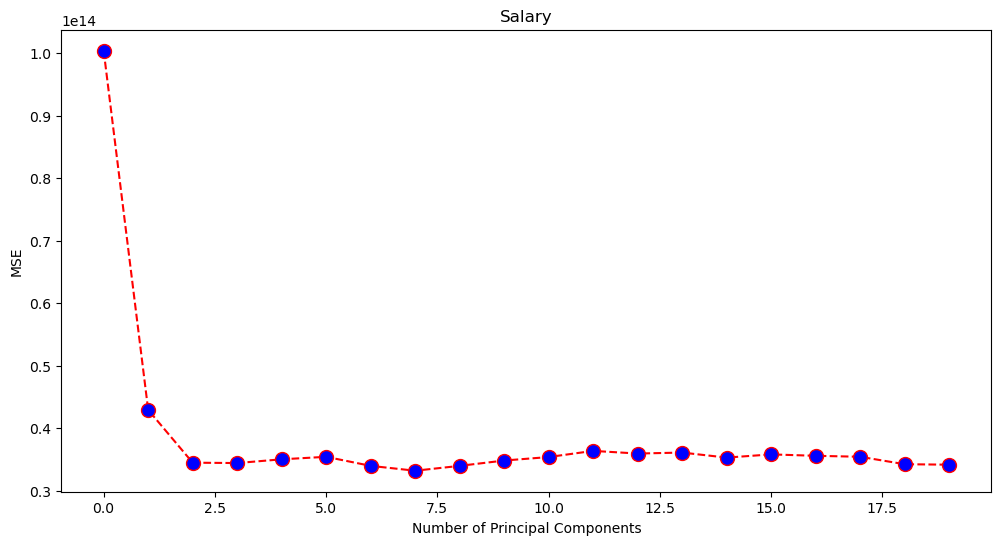

In [37]:
# Plot cross-validation results    
plt.figure(figsize=(12, 6))
plt.plot(mse,color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('Salary')

In [38]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 25.74,  42.3 ,  51.07,  56.59,  61.39,  65.18,  67.88,  70.02,
        72.08,  73.79,  75.46,  77.06,  78.45,  79.82,  81.16,  82.36,
        83.47,  84.55,  85.6 ,  86.59,  87.51,  88.37,  89.21,  89.92,
        90.61,  91.24,  91.86,  92.43,  92.99,  93.52,  94.03,  94.51,
        94.96,  95.39,  95.77,  96.11,  96.43,  96.72,  97.  ,  97.26,
        97.51,  97.74,  97.96,  98.17,  98.35,  98.52,  98.67,  98.81,
        98.94,  99.05,  99.16,  99.25,  99.33,  99.41,  99.48,  99.55,
        99.61,  99.66,  99.7 ,  99.74,  99.78,  99.81,  99.84,  99.87,
        99.89,  99.91,  99.93,  99.95,  99.96,  99.97,  99.98,  99.99,
       100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  ,
       100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  ,
       100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  ,
       100.  , 100.  , 100.  , 100.  ])

The graph and array above show how the model mean squared error and explained variance change with each principal component added. The first four components have a significant impact in reducing MSE and increasing explained variance, while adding even more components has only marginal benefits.

Text(0, 0.5, 'Mean Absolute Error')

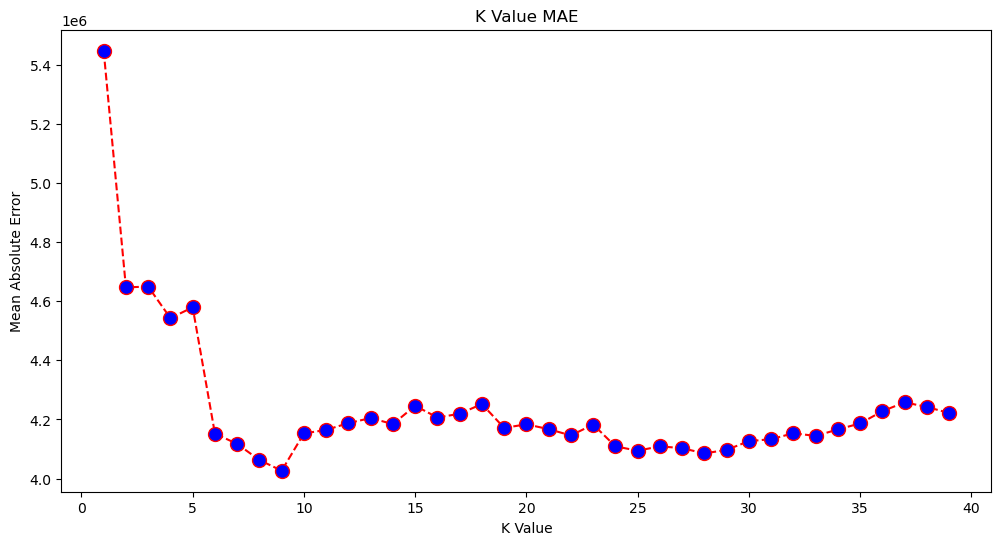

In [39]:
# Fitting results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3,random_state = 101)

# Scale the training and testing data using the first 4 components
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))[:,:3]

# Calculating MAE error for K values between 1 and 39
error = []
for i in range(1, 40):
    knn_PCA = KNeighborsRegressor(n_neighbors=i)
    knn_PCA.fit(X_reduced_train[:,:3], y_train)
    pred_i = knn_PCA.predict(X_reduced_test)
    mae = metrics.mean_absolute_error(y_test, pred_i)
    error.append(mae)
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

The plot above illustrates the mean absolute error based on the K value. K=9 had the minimum error, so I will use 9 as the number of nearest neighbors for the model.

In [40]:
# Train PCR model on training data using the first 4 components and 9 clusters
knn_PCA = KNeighborsRegressor(n_neighbors=9)
knn_PCA.fit(X_reduced_train[:,:3], y_train)

pred = knn_PCA.predict(X_reduced_test)

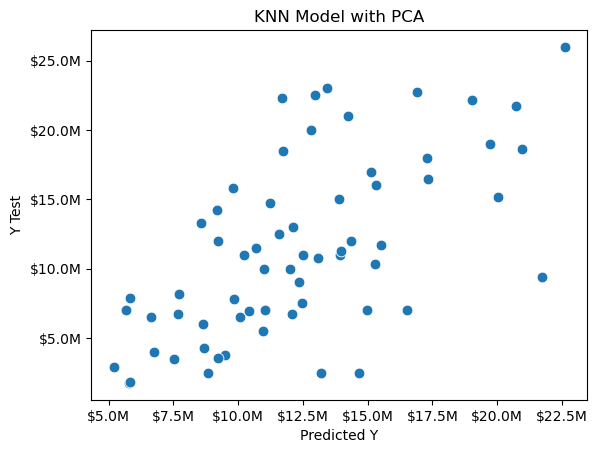

In [41]:
# Predicted vs Actual Plot
g = sns.scatterplot(pred,y_test, s=60)
plt.title('KNN Model with PCA')
plt.xlabel('Predicted Y')
plt.ylabel('Y Test')
plt.ticklabel_format(style='plain')
xlabels = ['$'+'{:,.1f}'.format(x) + 'M' for x in g.get_xticks()/1000000]
g.set_xticklabels(xlabels)
ylabels = ['$'+'{:,.1f}'.format(y) + 'M' for y in g.get_yticks()/1000000]
g.set_yticklabels(ylabels);

There is a weak positive correlation between the predicted and actual salary values.

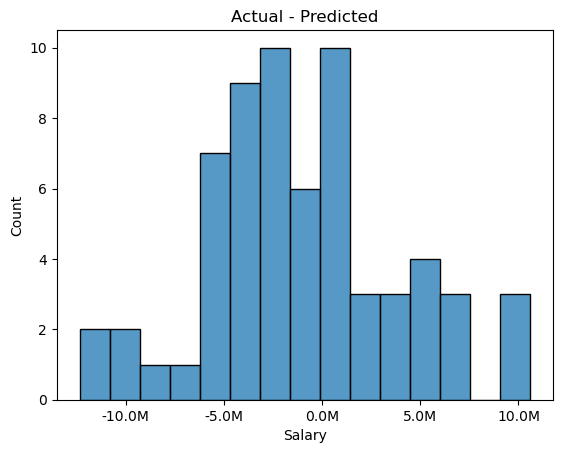

In [42]:
# Histogram of Residuals
g = sns.histplot((y_test-pred),bins=15)
plt.title('Actual - Predicted')
xlabels = ['{:,.1f}'.format(x) + 'M' for x in g.get_xticks()/1000000]
g.set_xticklabels(xlabels);

The residuals have a right skew and are centered closer to -2,500,000. This indicates that more predictions were overpredictions than underpredictions. This is a similar distribution to the Model 3: Principal Component Analysis.

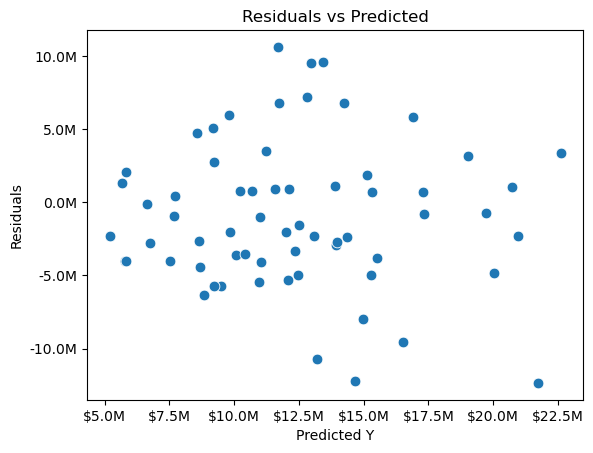

In [43]:
# Residuals vs Predicted Plot
g = sns.scatterplot(pred, (y_test-pred),s=60)
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Y')
plt.ylabel('Residuals')
plt.ticklabel_format(style='plain')
xlabels = ['$'+'{:,.1f}'.format(x) + 'M' for x in g.get_xticks()/1000000]
g.set_xticklabels(xlabels)
ylabels = ['{:,.1f}'.format(y) + 'M' for y in g.get_yticks()/1000000]
g.set_yticklabels(ylabels);

The Residuals vs Predicted plot appears mostly evenly spread around zero, with the exception of a couple outliers in the bottom right of the graph where the model overpredicted salary by close to $10,000,000. The residuals have a large spread, so the model could improve in accuracy. The spread of the residuals increases at larger predicted values, particularly with negative residuals.

In [44]:
print('MAE:', round(metrics.mean_absolute_error(y_test, pred),2))
print('MSE:', round(metrics.mean_squared_error(y_test, pred),2))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, pred)),2))
r2 = metrics.r2_score(y_test, pred)
adj_r2 = 1-(((1-r2)*((len(y))-1))/((len(y))-(4)-1))
print('R^2:', round(r2,4))
print('Adj R^2:', round(adj_r2,4))
mape = metrics.mean_absolute_percentage_error(y_test, pred)
print('MAPE:', round(mape*100,2), '%')
accuracy = 1 - mape
print('Accuracy:', round(accuracy*100, 2), '%.')

MAE: 4026361.93
MSE: 25301870075242.49
RMSE: 5030096.43
R^2: 0.3694
Adj R^2: 0.3572
MAPE: 63.03 %
Accuracy: 36.97 %.


This model explains 36% of the variation in salary and has a Root Mean Squared Error of just over $5 million. Aside from adjusted R^2, the previous K-Nearest Neighbors model without Principal Component Analysis performed better with a lower RMSE and higher accuracy. However, this model is better suited for K-Nearest Neighbor regression because of the reduced dimensions and standardized values for the independent variables. The model has some value in predicting salary but could be much stronger.

### Model 6: Random Forest

For my final model, I performed a Random Forest Regression with 1,000 decision trees. Random Forest is a great method with high dimensional data because it is able to determine which variables are most important through its many iterations.

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
predictors =batting_num.columns
X = batting[predictors]
y = batting['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3,random_state=101)

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 101)
# Train the model on training data
rf.fit(X_train, y_train)

# Use the forest's predict method on the test data
pred = rf.predict(X_test)

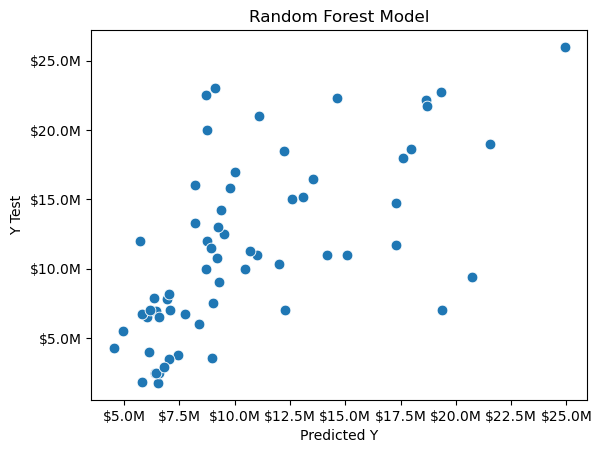

In [47]:
# Predicted vs Actual Plot
g = sns.scatterplot(pred,y_test, s=60)
plt.title('Random Forest Model')
plt.xlabel('Predicted Y')
plt.ylabel('Y Test')
plt.ticklabel_format(style='plain')
xlabels = ['$'+'{:,.1f}'.format(x) + 'M' for x in g.get_xticks()/1000000]
g.set_xticklabels(xlabels)
ylabels = ['$'+'{:,.1f}'.format(y) + 'M' for y in g.get_yticks()/1000000]
g.set_yticklabels(ylabels);

There is a weak correlation between the actual and predicted salary values. The relationship appears much stronger at smaller salary values and weakens as predicted salary increases.

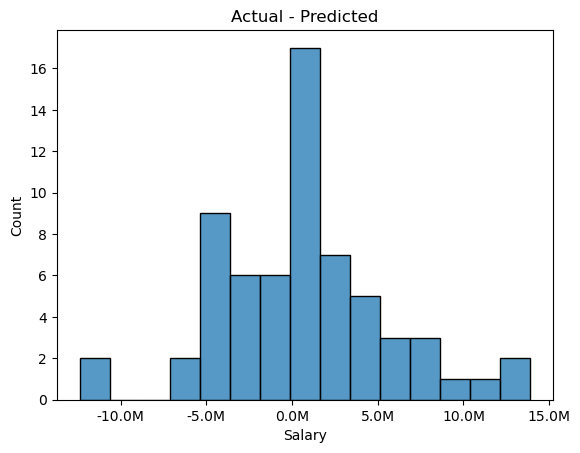

In [48]:
# Histogram of Residuals
g = sns.histplot((y_test-pred),bins=15)
plt.title('Actual - Predicted')
xlabels = ['{:,.1f}'.format(x) + 'M' for x in g.get_xticks()/1000000]
g.set_xticklabels(xlabels);

The residuals are normally distributed and centered around zero. There are a few values with errors greater than $10,000,000, including a couple overpredictions that are isolated from the rest of the distribution on the left side.

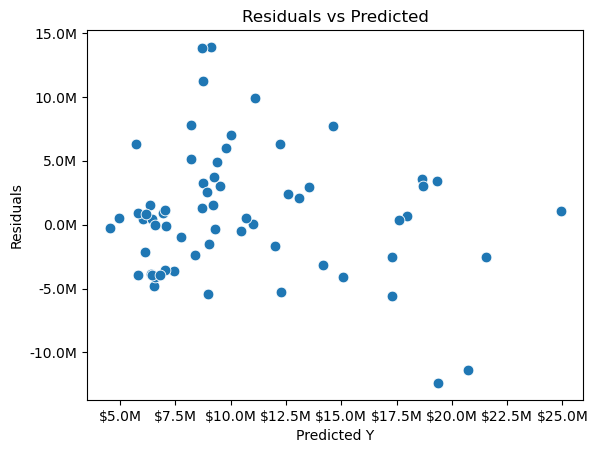

In [49]:
# Residuals vs Predicted Plot
g = sns.scatterplot(pred, (y_test-pred),s=60)
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Y')
plt.ylabel('Residuals')
plt.ticklabel_format(style='plain')
xlabels = ['$'+'{:,.1f}'.format(x) + 'M' for x in g.get_xticks()/1000000]
g.set_xticklabels(xlabels)
ylabels = ['{:,.1f}'.format(y) + 'M' for y in g.get_yticks()/1000000]
g.set_yticklabels(ylabels);

The points are clumped on the left side at lower predicted salary values. There are more extreme positive residuals at lower predicted salary values. As predicted salary increases, the residuals become more equally spread around zero with the exception of two overpredictions in the bottom right of the plot.

In [50]:
print('MAE:', round(metrics.mean_absolute_error(y_test, pred),2))
print('MSE:', round(metrics.mean_squared_error(y_test, pred),2))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, pred)),2))
r2 = metrics.r2_score(y_test, pred)
print('R^2:', round(r2,4))
mape = metrics.mean_absolute_percentage_error(y_test, pred)
print('MAPE:', round(mape*100,2), '%')
accuracy = 1 - mape
print('Accuracy:', round(accuracy*100, 2), '%.')

MAE: 3692631.14
MSE: 25046197560343.94
RMSE: 5004617.62
R^2: 0.3757
MAPE: 47.03 %
Accuracy: 52.97 %.


This model explains 37.6% of the variation in salary and has a Root Mean Squared Error of just over $5 million. The model has some value in predicting salary but could be much stronger.

In [51]:
# Get numerical feature importances
importances = list(rf.feature_importances_)# List of tuples with variable and importance
feature_importances = [(predictor, round(importance, 2)) for predictor, importance in zip(predictors, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: OPS_Career           Importance: 0.26
Variable: OPS+_Career          Importance: 0.23
Variable: R_Career             Importance: 0.04
Variable: SLG_Career           Importance: 0.03
Variable: BB_Career            Importance: 0.02
Variable: BA_Career            Importance: 0.02
Variable: TB_Career            Importance: 0.02
Variable: IBB_Career           Importance: 0.02
Variable: LD%                  Importance: 0.01
Variable: GB%                  Importance: 0.01
Variable: Oppo%                Importance: 0.01
Variable: cWPA                 Importance: 0.01
Variable: Age                  Importance: 0.01
Variable: PA                   Importance: 0.01
Variable: AB                   Importance: 0.01
Variable: R                    Importance: 0.01
Variable: SB                   Importance: 0.01
Variable: TB                   Importance: 0.01
Variable: Rdp                  Importance: 0.01
Variable: Rpos                 Importance: 0.01
Variable: RAR                  Importanc

Above shows the most important features to the random forest model. OPS_Career and OPS+_Career were the two most important variables in the model by far. All of the binary variables I created had no importance for the model.

## Evaluation

I will compare the success of the models by comparing the adjusted R^2, root mean squared error and accuracy from the results above. 

In [52]:
pd.read_csv('Salary Predictor Models Results.csv',index_col='Model').sort_values(by=['Adj R^2'],ascending=False)

,RMSE,Adj R^2,Accuracy
Model,,,
Stepwise,4713643.96,0.394828,0.511803
Lasso,4684995.53,0.389576,0.506148
Random Forest,5004617.62,0.375730,0.529674
KNN with PCA,5030096.43,0.357229,0.369652
PCA,5334975.17,0.276950,0.360016
KNN,4788620.86,-0.081857,0.522281


After sorting by adjusted R^2, it appears the Forward Stepwise Regression and Lasso Regression models performed the best. The Lasso model has a slightly lower root mean squared error, but also a slightly lower accuracy. I expect the adjusted R^2 would be even closer between the two models if the Lasso model did not have four more variables than the Stepwise model since the Lasso model actually has a 1% higher R^2 value.

Additionally, the Stepwise and Lasso models have a lot of overlapping predictors. The Lasso model does not include ISO and it includes R, 3, 5, HR_dummy and WAR_dummy, which the Forward Stepwise model does not. The results from these two multiple linear regression models are very similar, which makes sense considering the overlap in predictors. It is reassuring to see two separate methods of reducing dimensions result in the same base group of predictors, meaning these shared batting statistics are extremely significant in predicting salary. Because the Stepwise model has fewer predictors, I would say it is the best performing model.

The next best performing model was the Random Forest model. The root mean squared error is around 300,000 more than the two best performing models and the R^2 value is only 1-2% below. I did not calculate adjusted R^2 as I did for the other models because its interpretation does not fit with random forests.

The KNN with PCA model has a very similar root mean squared error and adjusted R^2 to the Random Forest, but the accuracy drops off by 16%. The PCA model has a similar accuracy of 36% while the rest of the models that did not use PCA have accuracies over 50%. PCA must have played a factor in producing extraordinarily large Mean Absolute Percentage Error results. PCA is well-suited for my dataset because of the high dimensions and multicollinearity among the variables. I expected the results to be much better than they were for both of the models that used PCA.

Finally, the KNN model has a root mean squared error and accuracy close to those of the best model. However, the adjusted R^2 is so large because I inputted all potential variables as independent variables, and adjusted R^2 punishes the model for adding predictors that do not help predict. The R^2 value from this model is .4285, which is just below the R^2 values of the Stepwise and Lasso regression models. Even though KNN is not suited for high dimensional data sets, all the other metrics are forcing me to consider this model more successful than the KNN with PCA and PCA models. I will compare their prediction results for the 2023 free agents to see which models tend to agree with each other more.

## Deployment

### Evaluating the Rays 2022 season

For the Tampa Bay Rays front office, signing free agents is a difficult task. Being in a small market and having one of the smallest payrolls  in the league makes signing big name free agents extremely difficult because these players cost the most money, especially compared to younger players who are not eligible for free agency. Most of the impact players for the Rays are acquired via the draft or trades. Because the scope of this project is solely to investigate free agents, I will briefly review the Tampa Bay Rays’ biggest needs and target a few key free agents and their predicted salary. If the Rays can sign one of these names for less than the model prediction, the Rays are receiving good value and are optimizing their payroll spending.

The 2022 Rays were a young team riddled with injuries for most of the season. They were able to slide into the final Wild Card spot and advance to the postseason but scored only one run in their two games against the Cleveland Guardians, including a game that went to 15 innings. Clearly, the biggest issue was offense in the postseason and these figures below highlight a similar struggle throughout the regular season.

In [53]:
from pybaseball import schedule_and_record

In [54]:
rays = schedule_and_record(2022, 'TB')

In [55]:
rays.describe()

,R,RA,Inn,Rank,Attendance,Streak
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,4.111111,3.790123,9.135802,2.641975,19477.537037,0.259259
std,2.799734,2.701350,0.673419,0.727604,9834.175324,2.263827
min,0.000000,0.000000,5.000000,1.000000,2488.000000,-5.000000
25%,2.000000,2.000000,9.000000,2.000000,11363.250000,-1.000000
50%,4.000000,3.000000,9.000000,3.000000,17252.000000,1.000000
75%,6.000000,5.000000,9.000000,3.000000,25025.000000,2.000000
max,12.000000,13.000000,13.000000,4.000000,46160.000000,6.000000


In [56]:
raysWinCount = pd.DataFrame()

In [57]:
raysWinCount['Wins'] = np.where((rays['W/L']=='W') | (rays['W/L'] == 'W-wo'), 1, 0).cumsum()

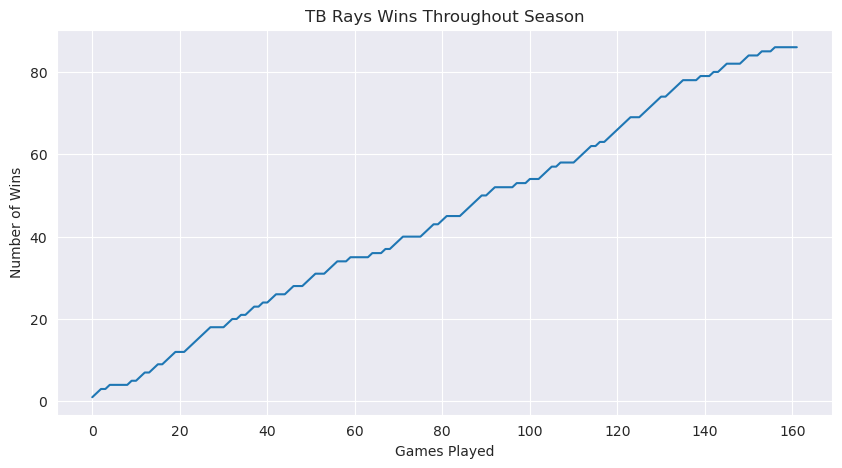

In [58]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(10, 5))
    sns.lineplot(x = raysWinCount.index, y = raysWinCount['Wins'])
    plt.title('TB Rays Wins Throughout Season')
    plt.xlabel('Games Played')
    plt.ylabel('Number of Wins')

The Rays wins increased at a fairly stable rate throughout the season. From Games 110 to 136, the wins increase at a steeper rate compared to after Game 136, when the Rays won only 8 more games and fell to the final Wild Card spot to barely make the postseason.

In [59]:
# Score Differential
raysDiff = pd.DataFrame()

In [60]:
raysDiff['Run Differential'] = (rays['R'] - rays['RA']).cumsum()

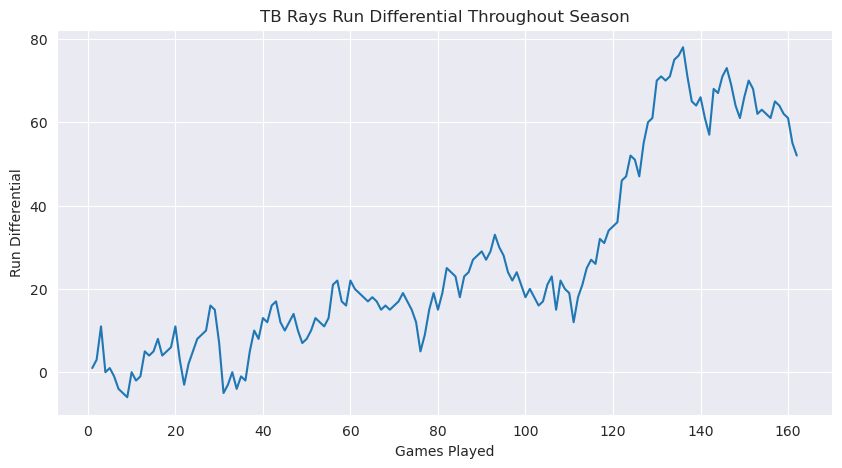

In [61]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(10, 5))
    sns.lineplot(x = raysDiff.index, y = raysDiff['Run Differential'])
    plt.title('TB Rays Run Differential Throughout Season')
    plt.xlabel('Games Played')
    plt.ylabel('Run Differential')

The Rays had a 25 game streak from Game 111 to 136 where differential increased from 12 to 78. This aligns with their increased rate of winning during this time in the plot above. For most of the season, they were barely outscoring opponents and when the game intensified in the postseason they were unable to score at all.

In [62]:
from pybaseball import batting_stats

In [63]:
battingStats = batting_stats(2022)

In [64]:
battingStats[['Name','Team','AVG','OBP','SLG','OPS','RBI','HR','wOBA','OBP+','wRC','WAR']][battingStats['Team'] == 'TBR']

,Name,Team,AVG,OBP,SLG,OPS,RBI,HR,wOBA,OBP+,wRC,WAR
14,Yandy Diaz,TBR,0.296,0.401,0.423,0.824,57,9,0.366,130,89,3.8
56,Randy Arozarena,TBR,0.263,0.327,0.445,0.773,89,20,0.336,106,87,2.7


The team's two best hitters were above average in most categories, but in the stat that summarizes offensive contribution, weighted runs created (wRC+), they were below the league average of 100.

Below are all the batters on the Rays from the 2022 season. The Rays had many injured players, which is one of the main reasons for the limited number of games for a lot of the players. I exported the table from Baseball Reference.

In [65]:
raysBatters = pd.read_csv('Tampa Bay Rays 2022 Batters.csv')

In [66]:
raysBatters

,Rk,Pos,Name,Age,G,PA,AB,R,H,2B,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Name-additional
0,1,C,Francisco Mejia#,26,93,299,289,32,70,22,...,0.381,0.645,87,110,6,2,0,1,0,mejiafr01
1,2,1B,Ji-Man Choi*,31,113,419,356,36,83,22,...,0.388,0.729,114,138,3,2,0,3,3,choiji01
2,3,2B,Brandon Lowe*,27,65,266,235,31,52,10,...,0.383,0.691,102,90,1,3,0,1,0,lowebr01
3,4,SS,Taylor Walls#,25,142,466,407,53,70,18,...,0.285,0.553,63,116,6,2,2,2,0,wallsta01
4,5,3B,Yandy Díaz,30,137,558,473,71,140,33,...,0.423,0.824,143,200,10,6,0,1,2,diazya01
5,6,LF,Randy Arozarena,27,153,645,586,72,154,41,...,0.445,0.773,124,261,17,11,0,2,2,arozara01
6,7,CF,Kevin Kiermaier*,32,63,221,206,28,47,8,...,0.369,0.649,89,76,2,1,0,0,0,kiermke01
7,8,RF,Manuel Margot,27,89,363,336,36,92,18,...,0.375,0.700,105,126,7,2,0,1,1,margoma01
8,9,DH,Harold Ramirez,27,120,435,403,46,121,24,...,0.404,0.747,119,163,5,9,0,4,1,ramirha02
9,10,IF,Isaac Paredes,23,111,381,331,48,68,16,...,0.435,0.740,114,144,12,4,0,2,0,paredis01


### Positional Breakdown

#### Catcher

Francisco Mejia, the starting catcher, was below average offensively. Bethancourt, who largely filled in while Mejia was injured, managed to produce slightly better numbers, albeit with a smaller sample size of 44 games compared to 99 for Mejia.


In [67]:
raysBatters[raysBatters['Pos']=='C']

,Rk,Pos,Name,Age,G,PA,AB,R,H,2B,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Name-additional
0,1,C,Francisco Mejia#,26,93,299,289,32,70,22,...,0.381,0.645,87,110,6,2,0,1,0,mejiafr01
16,17,C,Christian Bethancourt,30,44,151,149,16,38,6,...,0.436,0.701,101,65,3,0,0,0,0,bethach01
17,18,C,Mike Zunino,31,36,123,115,7,17,3,...,0.304,0.499,44,35,2,1,0,1,0,zuninmi01
20,21,C,Rene Pinto,25,25,83,80,5,17,3,...,0.325,0.566,64,26,3,1,0,0,0,pintore02


#### First Base

The Rays only permanent first basement, Choi, was a good offensive producer although he struggled in the second half of the season. The Rays are likely moving on from Choi, so they will have to fill his void.

In [68]:
raysBatters[raysBatters['Pos']=='1B']

,Rk,Pos,Name,Age,G,PA,AB,R,H,2B,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Name-additional
1,2,1B,Ji-Man Choi*,31,113,419,356,36,83,22,...,0.388,0.729,114,138,3,2,0,3,3,choiji01


#### Second Base

Brandon Lowe faced injuries in 2022, but with him returning healthy next season there should not be too much concern for production from second base.

In [69]:
raysBatters[raysBatters['Pos']=='2B']

,Rk,Pos,Name,Age,G,PA,AB,R,H,2B,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Name-additional
2,3,2B,Brandon Lowe*,27,65,266,235,31,52,10,...,0.383,0.691,102,90,1,3,0,1,0,lowebr01
15,16,2B,Vidal Brujan#,24,52,162,147,13,24,5,...,0.259,0.487,43,38,2,1,0,2,0,brujavi01
18,19,2B,Yu Chang,26,36,105,96,11,25,3,...,0.385,0.690,101,37,3,0,0,2,0,changyu01


#### Third Base

Yandy Diaz was the best hitter for the Rays in 2022 with an OPS+ of 143. I will not need to look at free agent third basemen.

In [70]:
raysBatters[raysBatters['Pos']=='3B']

,Rk,Pos,Name,Age,G,PA,AB,R,H,2B,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Name-additional
4,5,3B,Yandy Díaz,30,137,558,473,71,140,33,...,0.423,0.824,143,200,10,6,0,1,2,diazya01


#### Short Stop

The young star Wander Franco missed a lot of the season due to injury. He is a franchise cornerstone and will not be replaced this offseason.

In [71]:
raysBatters[raysBatters['Pos']=='SS']

,Rk,Pos,Name,Age,G,PA,AB,R,H,2B,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Name-additional
3,4,SS,Taylor Walls#,25,142,466,407,53,70,18,...,0.285,0.553,63,116,6,2,2,2,0,wallsta01
10,11,SS,Wander Franco#,21,83,344,314,46,87,20,...,0.417,0.746,117,131,5,0,0,4,1,francwa01


#### Left Field

Randy was one of the bright spots offensivley for the 2022 Rays. Randy can play multiple outfield positions, so another outfielder could be considered but would not be taking Randy's place on the roster.

In [72]:
raysBatters[raysBatters['Pos']=='LF']

,Rk,Pos,Name,Age,G,PA,AB,R,H,2B,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Name-additional
5,6,LF,Randy Arozarena,27,153,645,586,72,154,41,...,0.445,0.773,124,261,17,11,0,2,2,arozara01
13,14,LF,David Peralta*,34,47,180,161,10,41,11,...,0.335,0.652,92,54,2,2,0,3,1,peralda01


#### Center Field

The Rays will not be exercising their club option on Kiermaier, who is one of the longest tenured Rays. Siri had taken his spot for most of the year along with other outfielders switching positions. Although Siri is a solid replacement, the Rays could consider improving here in free agency.

In [73]:
raysBatters[raysBatters['Pos']=='CF']

,Rk,Pos,Name,Age,G,PA,AB,R,H,2B,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Name-additional
6,7,CF,Kevin Kiermaier*,32,63,221,206,28,47,8,...,0.369,0.649,89,76,2,1,0,0,0,kiermke01
14,15,CF,Jose Siri,26,56,178,166,35,40,9,...,0.367,0.660,92,61,1,1,0,0,0,sirijo01


#### Right Field

Margot was an above average hitter. Although he could be replaced, his production is stable enough and the Rays should look to improve elsewhere first.

In [74]:
raysBatters[raysBatters['Pos']=='RF']

,Rk,Pos,Name,Age,G,PA,AB,R,H,2B,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Name-additional
7,8,RF,Manuel Margot,27,89,363,336,36,92,18,...,0.375,0.700,105,126,7,2,0,1,1,margoma01
12,13,RF,Josh Lowe*,24,52,198,181,24,40,12,...,0.343,0.627,83,62,1,1,1,0,1,lowejo01


The main positions I have idenfitied for improvement are C, 1B, CF. However, all positions except SS, 3B and LF could realistically be replaced if the right free agent value is available. Next, I will look at the free agent options for C, 1B and outfield.

### Making Predictions

I will deploy the various models to predict the salary of 2023 free agent batters. The free agent list has only 23 players because I am only looking at batters who had more than 400 Plate Appearances last year since the model was only trained on batters with more than 400 Plate Appearances.

In [75]:
freeagents = pd.read_csv('2023 Salary Predictions Table.csv',index_col='Unnamed: 0')

In [76]:
freeagents.head()

,Name,Pos,Stepwise,Lasso,PCA,KNN,KNN with PCA,Random Forest,Name-additional
0,Anthony Rizzo QO,1B,1.697113e+07,1.833365e+07,1.780467e+07,1.710625e+07,1.736374e+07,1.954442e+07,rizzoan01
1,Joc Pederson QO,LF,1.025272e+07,1.122707e+07,1.186408e+07,8.916667e+06,1.000000e+07,8.704848e+06,pederjo01
2,Carlos Correa,SS,2.425349e+07,2.443675e+07,1.380363e+07,1.166875e+07,1.496296e+07,1.708616e+07,correca01
3,J.D. Martinez,DH,1.857347e+07,1.790591e+07,1.757004e+07,1.881250e+07,1.869707e+07,1.974952e+07,martijd02
4,Trea Turner QO,SS,2.037186e+07,2.055432e+07,1.425776e+07,1.090833e+07,1.603704e+07,2.035450e+07,turnetr01


I will now look at the available free agents by the positions I have identified as important.

#### Catcher

In [77]:
freeagents[freeagents['Pos']=='C']

,Name,Pos,Stepwise,Lasso,PCA,KNN,KNN with PCA,Random Forest,Name-additional
11,Willson Contreras QO,C,1.160138e+07,1.199777e+07,9.669457e+06,8403125.0,7.466667e+06,8178971.749,contrwi01
12,Gary Sanchez,C,9.679188e+06,1.051440e+07,6.722088e+06,7656250.0,1.013545e+07,7493039.966,sanchga02


Most of the models, including the best performing Stepwise and Lasso models, predict a higher salary for Contreras than Sanchez, which makes sense given Sanchez's struggles in recent years. However, the salary difference is within $2-3 million for all models. Let's look at their stats below to see if one seems to be a better value than the other.

In [78]:
freeagentBatting = pd.read_csv('2023 Free Agent Batting Stats.csv',index_col = 'Unnamed: 0')

In [79]:
freeagentBatting[freeagentBatting['2'] == 1][['Name','G','BA','OBP','SLG','OPS','RBI','HR','OPS+','WAR','G_Career','OPS+_Career','BA_Career','HR_Career']]

,Name,G,BA,OBP,SLG,OPS,RBI,HR,OPS+,WAR,G_Career,OPS+_Career,BA_Career,HR_Career
11,Willson Contreras QO,113,0.243,0.349,0.466,0.815,55,22,128.0,3.9,734,115.0,0.256,117.0
12,Gary Sanchez,128,0.205,0.282,0.377,0.659,61,16,89.0,0.9,666,109.0,0.225,154.0


Wilson Contreras clearly had the better season last year, and by looking at a few career statistics, he has performed better offensively over the course of his career. Contreras performed better than the Rays combination of catchers last season and would be a significant upgrade. Sanchez would not be an upgrade based on last season alone. However, if the Rays believe they can get the most out of Sanchez with the promise he showed earlier in his career, he could be an under the radar target that the Rays could sign at a lower salary. 

If the Rays can sign Contreras for less than $11 million annually or Sanchez for less than 8 million, the Rays would be receiving good value with their contracts. Contreras is a better target overall and his predicted salary is not out of the question for the Rays, but given the Rays' limited spending, Sanchez may be a more realistic target.

#### First Base

In [80]:
freeagents[freeagents['Pos']=='1B']

,Name,Pos,Stepwise,Lasso,PCA,KNN,KNN with PCA,Random Forest,Name-additional
0,Anthony Rizzo QO,1B,1.697113e+07,1.833365e+07,1.780467e+07,17106250.00,1.736374e+07,1.954442e+07,rizzoan01
8,Jose Abreu,1B,1.914410e+07,1.987829e+07,1.895093e+07,19595750.00,1.932856e+07,1.908002e+07,abreujo02
15,Yulieski Gurriel,1B,5.342111e+06,6.812948e+06,9.176549e+06,7108333.25,9.233333e+06,6.426320e+06,gourryu01


Both Anthony Rizzo and Jose Abreu are projected salaries close to $20 million across all models, which is likely out of range for the Rays. Abreu is projected to make more than Rizzo across all models except the Random Forest, which has Rizzo making just 500,000 more.

In [81]:
freeagentBatting[freeagentBatting['3'] == 1][['Name','G','BA','OBP','SLG','OPS','RBI','HR','OPS+','WAR','G_Career','OPS+_Career','BA_Career','HR_Career']]

,Name,G,BA,OBP,SLG,OPS,RBI,HR,OPS+,WAR,G_Career,OPS+_Career,BA_Career,HR_Career
0,Anthony Rizzo QO,130,0.224,0.338,0.480,0.817,75,32,131.0,2.3,1536,127.0,0.265,283.0
8,Jose Abreu,157,0.304,0.378,0.446,0.824,75,15,133.0,4.2,1270,134.0,0.292,243.0
15,Yulieski Gurriel,146,0.242,0.288,0.360,0.647,53,8,84.0,-0.3,801,110.0,0.284,94.0


First Base is the biggest position of need and theoretically one of Rizzo or Abreu would perfectly fill the gap for the Rays. Rizzo and Abreu had great seasons in 2022 and have had great careers overall. In 2022, both players had an OPS more than 30% better than league average. However, signing one of them would cost 1/5 of their total payroll from last season and it is not realistic for the Rays to spend that much money on a free agent. Gurriel would be the best free agent target for first base. Although his 2022 was below average, he has performed well over his career. Similar to Sanchez, the Rays could target Gurriel at a lower salary and hope he can perform closer to his career averages. The Rays should target Gurriel at $6 million.

#### Outfield

In [82]:
freeagents[freeagents['Pos'].isin(['LF','CF','RF'])]

,Name,Pos,Stepwise,Lasso,PCA,KNN,KNN with PCA,Random Forest,Name-additional
1,Joc Pederson QO,LF,1.025272e+07,1.122707e+07,1.186408e+07,8916666.625,1.000000e+07,8.704848e+06,pederjo01
6,Aaron Judge QO,RF,3.146388e+07,3.210021e+07,2.335908e+07,7028124.875,1.973972e+07,2.419190e+07,judgeaa01
16,Jurickson Profar,LF,6.184627e+06,6.323814e+06,8.758464e+06,5643750.000,6.942222e+06,5.843472e+06,profaju01
17,Brandon Nimmo QO,CF,1.916807e+07,1.831495e+07,1.085477e+07,5608958.250,7.452778e+06,1.664002e+07,nimmobr01
19,Kole Calhoun,RF,7.772073e+06,8.282006e+06,8.526611e+06,8645833.375,9.826190e+06,8.645950e+06,calhoko01
22,Ben Gamel,RF,6.413784e+06,6.513249e+06,5.745171e+06,5802083.250,5.957407e+06,4.368725e+06,gamelbe01


The biggest free agent of 2023 is Aaron Judge. The Stepwise and Lasso models predict he will make around $32 million annually. This number could increase even higher since the Yankees are willing to spend big to keep their generational player, so the Rays are out of contention for Judge. The Rays are realistically going to spend a max of 10-14 million on a free agent, with more signings occuring in the 5-8 million range. Pederson and Nimmo are likely out of range with predicted salaries over 10 million. I will look at the remaining outfielders' statistics to determine which players to target.

In [83]:
freeagentBatting[(freeagentBatting['7'] == 1) | (freeagentBatting['8'] == 1) | (freeagentBatting['9'] == 1)][['Name','G','BA','OBP','SLG','OPS','RBI','HR','OPS+','WAR','G_Career','OPS+_Career','BA_Career','HR_Career']]

,Name,G,BA,OBP,SLG,OPS,RBI,HR,OPS+,WAR,G_Career,OPS+_Career,BA_Career,HR_Career
1,Joc Pederson QO,134,0.274,0.353,0.521,0.874,70,23,144.0,1.3,1019,116.0,0.237,171.0
6,Aaron Judge QO,157,0.311,0.425,0.686,1.111,131,62,211.0,10.6,729,163.0,0.284,220.0
13,Andrew McCutchen,134,0.237,0.316,0.384,0.700,69,17,99.0,1.1,1895,129.0,0.277,287.0
16,Jurickson Profar,152,0.243,0.331,0.391,0.723,58,15,111.0,3.1,836,94.0,0.238,78.0
17,Brandon Nimmo QO,151,0.274,0.367,0.433,0.800,64,16,130.0,5.1,608,130.0,0.269,63.0
19,Kole Calhoun,125,0.196,0.257,0.330,0.587,49,12,67.0,-1.5,1196,102.0,0.243,173.0
22,Ben Gamel,115,0.232,0.324,0.369,0.693,46,9,96.0,0.1,679,96.0,0.253,40.0


Andrew McCutchen is identified as an outfielder from my batting dataset, but not on the free agent table from Spotrac, which is why he is identified here as an outfielder but not above. I will investigate him in the next section for Designated Hitters.

Of the realistic targets remaining, Profar seems to be the best choice. Across the models, his predicted salary is lower than that of Calhoun and similar to that of Gamel. Profar had a much more productive 2022 season than both of those players, especially compared to Calhoun who provided negative value to his team and finished with a WAR of -1.5. Gamel played similar to his career averages, while Profar had a stand-out 2022 season. Profar could regress to the mean next season, but his 2022 numbers are significantly better than Gamel's and could instead signal his improvement over time. The Rays should target Profar at an annual salary of $6.5 million.

While Nimmo is definitely out of range at a predicted salary around 18 million, Pederson is still on the cusp of the Rays' target limit. While his WAR was less than half that of Profar, Pederson is a great slugger and would definitely improve the Rays offense. The Rays should prioritize signing Profar, but they could also target Pederson at a salary below $10 million.

#### Designated Hitter

In [84]:
freeagents[freeagents['Pos']=='DH']

,Name,Pos,Stepwise,Lasso,PCA,KNN,KNN with PCA,Random Forest,Name-additional
3,J.D. Martinez,DH,1.857347e+07,1.790591e+07,1.757004e+07,18812500.0,1.869707e+07,1.974952e+07,martijd02
9,Nelson Cruz,DH,1.980996e+07,1.961488e+07,1.879390e+07,18872750.0,1.740278e+07,1.888147e+07,cruzne02
13,Andrew McCutchen,DH,2.352901e+07,2.359575e+07,1.854466e+07,18872750.0,1.438889e+07,1.931575e+07,mccutan01


While I did not identify designated hitter as a position of need, the Rays offense needs improving overall and designated hitter is the position where only offensive production matters. However, the predictions for the three designated hitters are all close to $20 million, which the Rays simply cannot afford to pay.

In [85]:
freeagentBatting[(freeagentBatting['Name-additional'] == 'martijd02') | (freeagentBatting['Name-additional'] == 'cruzne02') | (freeagentBatting['Name-additional'] == 'mccutan01')][['Name','G','BA','OBP','SLG','OPS','RBI','HR','OPS+','WAR','G_Career','OPS+_Career','BA_Career','HR_Career']]

,Name,G,BA,OBP,SLG,OPS,RBI,HR,OPS+,WAR,G_Career,OPS+_Career,BA_Career,HR_Career
3,J.D. Martinez,139,0.274,0.341,0.448,0.790,62,16,117.0,1.1,1409,132.0,0.288,282.0
9,Nelson Cruz,124,0.234,0.313,0.337,0.651,64,10,90.0,0.1,2006,131.0,0.274,459.0
13,Andrew McCutchen,134,0.237,0.316,0.384,0.700,69,17,99.0,1.1,1895,129.0,0.277,287.0


All three of these players have fantastic career statistics, which could be inflating their value because their 2022 statistics were slightly below league average with the exception of J.D. Martinez, who had an above average season. Even if the Rays could afford one of these players, their recent performance does not seem to indicate a good value for the Rays.

### Final Recommendation

Based on the predicted salaries above and the positional needs of the Rays, I have identified several free agent targets. Theoretically, these free agents, given a salary close to their actual value, would choose to go to Tampa Bay. However, many players desire to play in a larger market, even for the same salary.

Here are the Rays' target 2023 free agents and ideal annual salary values:

In [86]:
targets = { 'Player': ['Wilson Contreras','Gary Sanchez','Yulieski Gurriel','Jurickson Profar','Joc Pederson'],
           'Pos':['C','C','1B','LF','LF'],
          'Target Salary': [11000000,8000000,6000000,6500000,10000000]}
targetsdf = pd.DataFrame(targets)

In [87]:
targetsdf

,Player,Pos,Target Salary
0,Wilson Contreras,C,11000000
1,Gary Sanchez,C,8000000
2,Yulieski Gurriel,1B,6000000
3,Jurickson Profar,LF,6500000
4,Joc Pederson,LF,10000000


## Conclusion

There are many factors that affect the actual contract free agents receive aside from offensive statistics. These factors include individual player contract demands, current market valuation, the supply of comparable free agent talent, the team offering the contract, and intangible characteristics that define a player and can make the team better overall. The market valuation and supply of players becomes clearer as the initial signings are completed. A General Manager must be aware of current conditions and consider all of these factors and more when actually proposing a contract based on this model.

For the Rays, I have identified 5 free agent targets for the three positions they need to improve the most: Catcher, First Base and Outfield (any outfield position). By analyzing the predicted salaries from the models I generated, I included a realistic target salary for each of the free agents. The Rays general mangement can use these players and target salaries as a reference point during their player negotiations and roster planning for 2023.

### Limitations

In a perfect world, players would be paid commensurate with their performance. The factors I mentioned above are harder to quantify and predict with the year-to-year variation that exists. The models I built were not strong predictors of salary. I was able to explain around 40% of the variation in salary with the Stepwise and Lasso regression models with a root mean squared error of $4.7 million. Ideally, a root mean squared error of less than 2,000,000 and an adjusted R^2 of greater than .70 would indicate much more accurate predictions. Considering all the different factors that determine salary, I am satisfied in explaining 40% of the variation from batting statistics alone. 

Another limitation of the models is that it can only predict the salary based on a player’s season with more than 400 plate appearances. This eliminates good players who were injured from consideration. The training dataset was built on six years of data, so an injured player in 2017 who played fully in 2018 is still included in the model. However, I cannot accurately predict the salary of a 2023 free agent with less than 400 plate appearances in 2022 because the model was not built on these kinds of data points. This is a limitation because relying solely on this model could lead the Rays to miss out on a first baseman who was injured in 2022 but would be an excellent fit for next year.

The final dataset for the models has 213 observations. This limits the potential to improve the accuracy of the models and to try other machine learning models such as neural networks. However, it is difficult to grow the number of observations. I only went back to 2015 because of how much salary has increased year after year, and I did not want to include inaccurate training points for a model that is predicting salary today. Additionally, I only looked at players with more than six years of experience, and this eliminates a large number of potential observations. 

Players are eligible for free agency after six years of service, but this does not mean all players who have played more than six years signed their contracts as free agents. Many young star players sign long-term contract extensions well before six years of service. While their salary would be similar to that of free agent players, it was not determined by the same process. This could be a limitation, but I believe for the purposes of the model this difference is not significant because the salaries are typically very high, similar to salaries of free agents.

The models attempted to predict the market value of a free agent. However, because the market is generally skewed in favor of richer teams, the real market value of a free agent is greater than the market value of a player for the Rays. Teams in larger markets, like the Yankees and Mets in New York, can afford to overpay for a free agent because they generate more revenue overall and per dollar spent on payroll. This partly explains why the Rays typically do not make a lot of free agent signings: they have to find a player significantly below market value. High profile free agents are less likely to go to the Rays for other reasons besides salary. Larger markets offer more opportunities for a player outside of baseball. For example, even if the Rays could offer Joc Pederson his market value, he is still more likely to choose an equal offer with a larger market team. This limits the effectiveness of using a league-wide salary predicting model for the Rays' purposes.

### Areas for Further Study

If I were to continue my study, I would love to build a model to predict pitcher salary. This would result in two separate models for starting and relief pitchers since their statistics vary so greatly due to different average innings pitched. Additionally, starting and relief pitchers usually have different skillsets and are overall valued differently. The Rays have extremely good starting pitchers. However, their relief pitching could be improved and identifying undervalued relief pitchers would have been a valuable insight.

I would also like to investigate total contract value and its effect on future payroll flexibility. A free agent player that is worth $20 million annually is more likely to sign a long-term contract of 100 million or more. Because future performance is uncertain, this is typically an advantage for great players because they have the leverage to ensure they are paid for a long period of time. However, players that are worth below 10 million annually are more likely to sign short-term contracts because teams do not want to stay committed to an average player for a long time, and because it gives players the opportunity to perform well and earn a larger contract in the near future. 

From the perspective of a team’s general management, there is an optimal balance of short-term and long-term contracts to ensure payroll flexibility while maintaining a consistent roster of good players year after year. I would assume the Rays, who are known to be savvy, would prefer to avoid the uncertainty with larger contracts unless the potential player value is far greater than the uncertainty.

### Data Sources

Data used to create the training dataset and to predict the 2023 free agent salary comes from Baseball Reference. For each season from 2015-2022 (excluding 2020), I navigated to "Batting" and exported the Standard Batting, Value, Cumulative Batting and Advanced Batting tables. The links to each year are below.

https://www.baseball-reference.com/leagues/majors/2022.shtml

https://www.baseball-reference.com/leagues/majors/2021.shtml

https://www.baseball-reference.com/leagues/majors/2019.shtml

https://www.baseball-reference.com/leagues/majors/2018.shtml

https://www.baseball-reference.com/leagues/majors/2017.shtml

https://www.baseball-reference.com/leagues/majors/2016.shtml

https://www.baseball-reference.com/leagues/majors/2015.shtml

2023 Free Agent Data comes from Spotrac.

https://www.spotrac.com/mlb/free-agents/ufa/batters/

2022 Tampa Bay Rays Roster

https://www.baseball-reference.com/teams/TBR/2022.shtml